<a href="https://colab.research.google.com/github/huiishan99/UoA_HumanActivityPatternProcessing/blob/main/Assignment5/Sample/Project5_ipynb_English.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


If you want to run it in your own GoogleColab environment, press [File] → [Save copy to drive] on the upper left, and a copy of this ipynb will be saved in your Google Drive, so please work there. By the way, this ipynb cannot be executed because it is read-only.

Please do the following items in advance as preparation.
- Create a personal Google account
- Make GoogleColaboratory available

Please refer to the link below for the basic usage of Google Colaboratory.

- [Qiita - 【秒速で無料GPUを使う】深層学習実践Tips on Colaboratory](https://qiita.com/tomo_makes/items/b3c60b10f7b25a0a5935)

# Project5
Challenges for neural networks

Double click or press Enter to edit

# Flow

Sample
1. MLP (Multilayer perceptron)
2. CNN (Convolutional Neural Network)
3. RNN (Recurrent Neural Network)

Examples
1. CNN (Gesture data)
2. RNN (HandDB Character Classification)
3. RNN + CNN (HandDB)
4. FFT + CNN (SignDB Signature Verification)

Task
1. Multi-class classification of lowercase alphabet images by CNN
2. Use RNN to authenticate character data(Signature Verification)


# Sample

## MLP(MultiLayer Perceptron)

Implement MLP and train the Iris dataset.<br>

### About dataset

The Iris dataset is a famous dataset that has been used for a long time in the field of machine learning and statistics. It consists of petals and gaku lengths of three varieties (Setosa, Versicolour, Virginica) stored in a 150 × 4 numpy.ndarray.


#### Loading a dataset

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

#### Dataset description

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### Flower type
Setosa、Versicolour and Virginica

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### View data

In [ ]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.loc[df['target'] == 0, 'target'] = "setosa"
df.loc[df['target'] == 1, 'target'] = "versicolor"
df.loc[df['target'] == 2, 'target'] = "virginica"

In [ ]:
df.head()

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2  setosa
1                4.9               3.0  ...               0.2  setosa
2                4.7               3.2  ...               0.2  setosa
3                4.6               3.1  ...               0.2  setosa
4                5.0               3.6  ...               0.2  setosa

[5 rows x 5 columns]

In [ ]:
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count         150.000000        150.000000         150.000000        150.000000
mean            5.843333          3.057333           3.758000          1.199333
std             0.828066          0.435866           1.765298          0.762238
min             4.300000          2.000000           1.000000          0.100000
25%             5.100000          2.800000           1.600000          0.300000
50%             5.800000          3.000000           4.350000          1.300000
75%             6.400000          3.300000           5.100000          1.800000
max             7.900000          4.400000           6.900000          2.500000

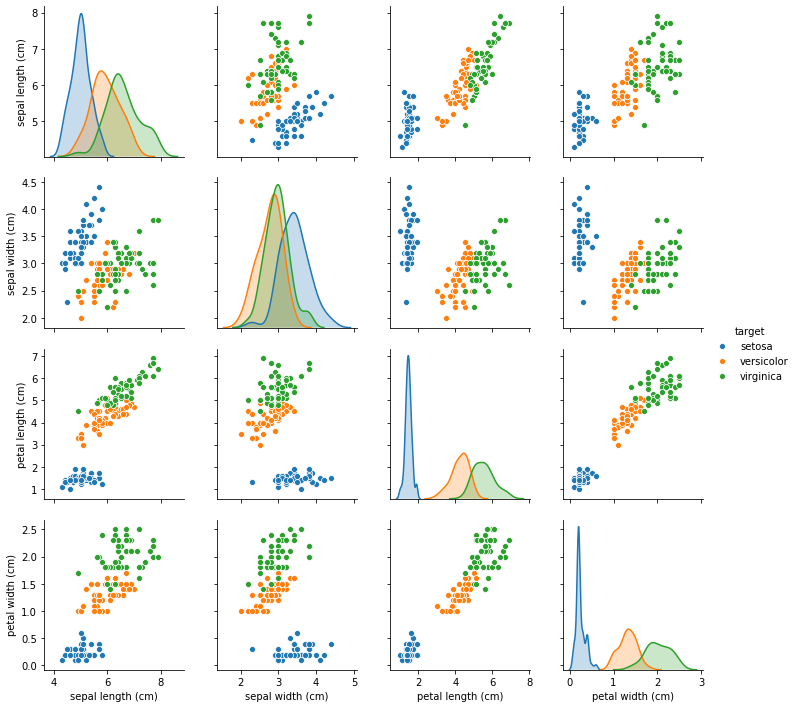

In [ ]:
import seaborn as sns
sns.pairplot(df, hue="target")

### About MLP
Here, we will implement MLP using keras。<br>
Create a model that predicts the classification from the 4 features.

#### Usage data

In [ ]:
X = iris.data
y = iris.target

#### Hyper parameters

In [ ]:
num_classes = len(iris.target_names)
batch_size = 5
epochs = 20
seed = 7

#### Construction of MLP

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import tensorflow as tf

model = tf.keras.Sequential()
model.add(Dense(12, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#### Model visualization

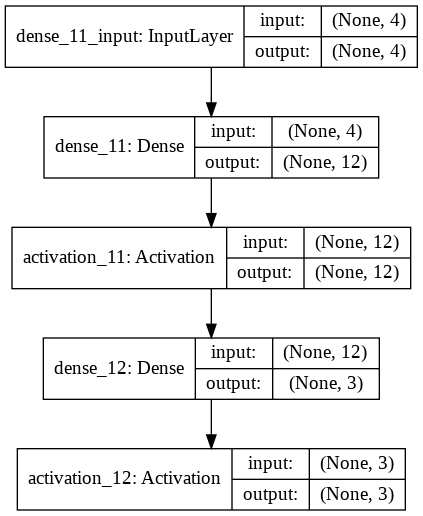

In [ ]:
from keras.utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

#### Learning the model
Apply 5-part cross-validation to verify and confirm how well the implemented MLP can handle the population.<br>

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=seed, shuffle=True)
predicted = np.empty(len(y))
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))
  predicted[test_index] = np.argmax(model.predict(X_test), axis=1)

Train on 120 samples, validate on 30 samples
Epoch 1/20
120/120 [==============================] - 0s 678us/step - loss: 0.0745 - acc: 0.9667 - val_loss: 0.1068 - val_acc: 0.9333
Epoch 2/20
120/120 [==============================] - 0s 612us/step - loss: 0.0700 - acc: 0.9833 - val_loss: 0.1448 - val_acc: 0.9333
Epoch 3/20
120/120 [==============================] - 0s 588us/step - loss: 0.0746 - acc: 0.9667 - val_loss: 0.1006 - val_acc: 0.9667
Epoch 4/20
120/120 [==============================] - 0s 610us/step - loss: 0.0849 - acc: 0.9583 - val_loss: 0.1292 - val_acc: 0.9333
Epoch 5/20
120/120 [==============================] - 0s 621us/step - loss: 0.0745 - acc: 0.9917 - val_loss: 0.1099 - val_acc: 0.9667
Epoch 6/20
120/120 [==============================] - 0s 604us/step - loss: 0.0964 - acc: 0.9667 - val_loss: 0.1378 - val_acc: 0.9333
Epoch 7/20
120/120 [==============================] - 0s 586us/step - loss: 0.0629 - acc: 0.9833 - val_loss: 0.1652 - val_acc: 0.9333
Epoch 8/20
120/12

### About the results

#### Accuracy of test data

In [ ]:
from sklearn.metrics import accuracy_score
print('Test accuracy:', accuracy_score(y, predicted))

Test accuracy: 0.94


#### Confusion matrix for test data

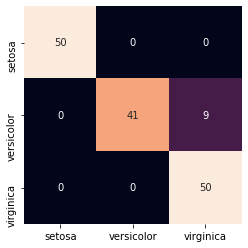

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cmx = confusion_matrix(y, predicted)
df_cmx = pd.DataFrame(cmx, index=iris.target_names, columns=iris.target_names)
sns.heatmap(df_cmx, annot=True, cbar=False, square=True, fmt="d")

## CNN

Implementing CNN and learn MNIST.<br>

### About dataset

MNIST (Mixed National Institute of Standards and Technology database) is an image data set consisting of 60,000 handwritten digit images and 10,000 test images. In addition, it is a data set that gives correct labels to handwritten numbers "0 to 9", and is a data set often used in image classification problems.<br>

#### Loading data

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


#### View data

In [ ]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print("X_train[0]:")
print(X_train[0])

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
X_train[0]:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0

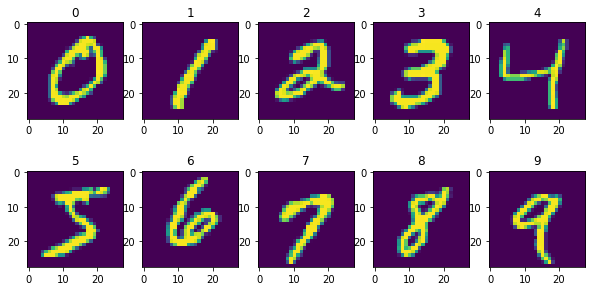

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
for i in range(10):
  ax = fig.add_subplot(2, 5, i+1)
  ax.imshow(X_train[y_train.tolist().index(i)])
  ax.set_title(i)

#### Data normalization

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
from keras import backend as K
img_rows, img_cols = X_train.shape[1:3]
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

### About CNN

#### Parameters

In [ ]:
batch_size = 128
num_classes = 10
epochs = 12

#### Model creation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adadelta
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#### Model visualization

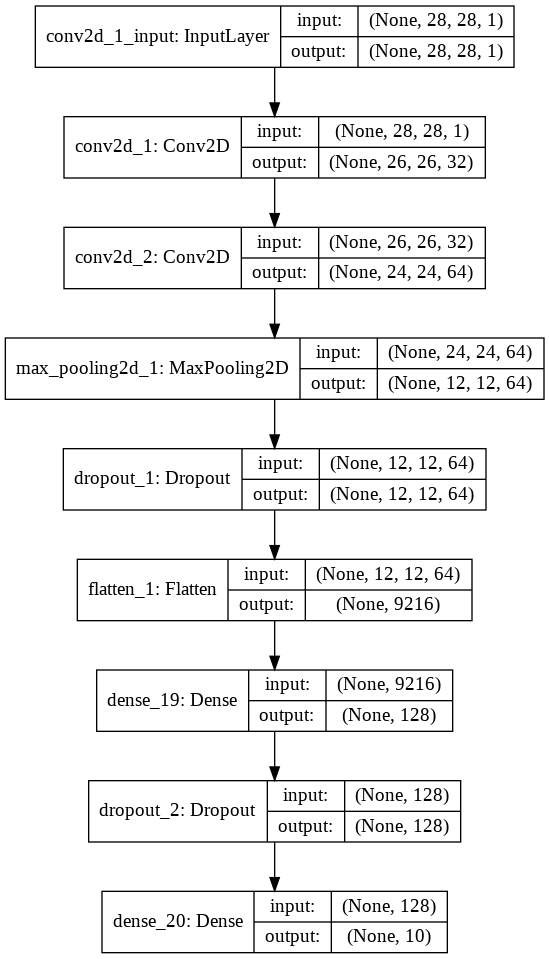

In [ ]:
from keras.utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

#### Learning the model

In [ ]:
hist = model.fit(X_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.2702 - acc: 0.9173 - val_loss: 0.0590 - val_acc: 0.9807
Epoch 2/12
60000/60000 [==============================] - 4s 63us/step - loss: 0.0896 - acc: 0.9737 - val_loss: 0.0420 - val_acc: 0.9862
Epoch 3/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.0678 - acc: 0.9798 - val_loss: 0.0355 - val_acc: 0.9879
Epoch 4/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.0547 - acc: 0.9833 - val_loss: 0.0332 - val_acc: 0.9889
Epoch 5/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.0486 - acc: 0.9852 - val_loss: 0.0292 - val_acc: 0.9901
Epoch 6/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.0430 - acc: 0.9869 - val_loss: 0.0285 - val_acc: 0.9904
Epoch 7/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.0388 - acc: 0.9879 - val_loss: 0.0282 - val_ac

### About the results

#### Accuracy for test data

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02633124580890726
Test accuracy: 0.9919


#### Visualization of learning process

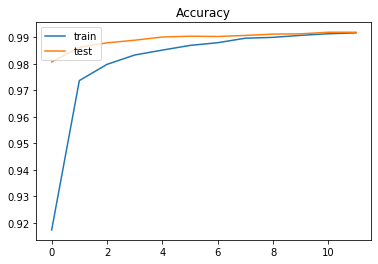

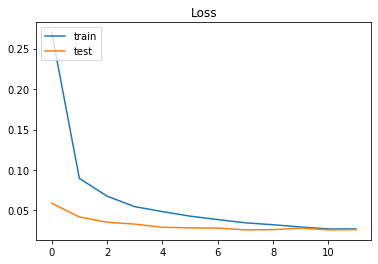

In [ ]:
# Plot transition of accuracy rate
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Plot loss transition
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

#### Confusion matrix for test data

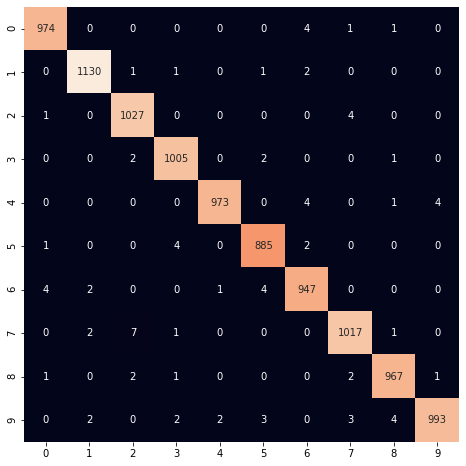

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cmx = confusion_matrix(y_test, np.argmax(model.predict(X_test), axis=1))
df_cmx = pd.DataFrame(cmx)
fig = plt.figure(figsize=(8, 8))
sns.heatmap(df_cmx, annot=True, cbar=False, square=True, fmt="d")

## RNN

Implement RNN and try out Project0 data.<br>

### About dataset

#### Data description

**Human Action Recognition Data**

In the data folder there are 4 folders for acceleration data. Folder act01, act02, act03 are for 'Walking', 'Sitting', 'Jogging' human action data respectively. Each folder has 7 text files containing action data. And the test folder containing 10 text files of human action data as unknown test data.

#### Loading data

In [ ]:
!wget  "https://drive.google.com/uc?export=download&id=1e7SIWWdQ-wee8v0XUK-qJFEWMTujSaGP" -O project0_data.zip
!unzip project0_data.zip

--2019-12-12 06:21:38--  https://drive.google.com/uc?export=download&id=1e7SIWWdQ-wee8v0XUK-qJFEWMTujSaGP
Resolving drive.google.com (drive.google.com)... 64.233.189.100, 64.233.189.138, 64.233.189.113, ...
Connecting to drive.google.com (drive.google.com)|64.233.189.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qm1lt03ltb71i488t7g1n7ghbndfor7u/1576130400000/12360162376384578551/*/1e7SIWWdQ-wee8v0XUK-qJFEWMTujSaGP?e=download [following]
--2019-12-12 06:21:39--  https://doc-10-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qm1lt03ltb71i488t7g1n7ghbndfor7u/1576130400000/12360162376384578551/*/1e7SIWWdQ-wee8v0XUK-qJFEWMTujSaGP?e=download
Resolving doc-10-3c-docs.googleusercontent.com (doc-10-3c-docs.googleusercontent.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to doc-10-3c-docs.googleusercontent.com (doc-10

In [ ]:
import numpy as np
import os
import glob
target_acts = ["act01", "act02", "act03"]
X_train = []
y_train = []
for i, target_act in enumerate(target_acts):
  for fname in sorted(glob.glob(os.path.join(target_act, "*.txt"))):
    X_train.append(np.loadtxt(fname))
    y_train.append(i)
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
X_test = []
for fname in sorted(glob.glob(os.path.join("test", "*.txt"))):
  X_test.append(np.loadtxt(fname))
X_test = np.array(X_test)
y_test = np.array([1, 2, 2, 2, 0, 2, 0, 1, 0, 1])

#### View data

In [ ]:
X_train.shape

(21, 101, 3)

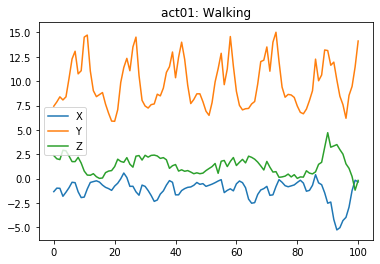

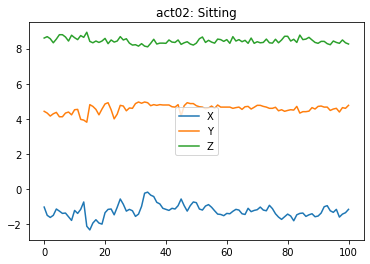

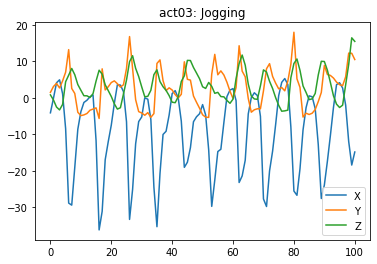

In [ ]:
import matplotlib.pyplot as plt
act_names = ["Walking", "Sitting", "Jogging"]
for i in range(3):
  # for data in X_train[y_train==i]:
  #   plt.plot(data)
  plt.plot(X_train[y_train==i][0])
  plt.title(target_acts[i]+": "+act_names[i])
  plt.legend(["X", "Y", "Z"])
  plt.show()

### About RNN
Here we use LSTM which is a kind of RNN

#### Parameters

In [ ]:
timesteps, features = X_train.shape[-2:]
num_classes = len(target_acts)
print("Timesteps:", timesteps)
print("Features:", features)
print("# of Classes:", num_classes)

Timesteps: 101
Features: 3
# of Classes: 3


#### Model creation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding, Masking
from keras.layers import LSTM
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Masking(mask_value=0., input_shape=(timesteps, features)))
model.add(tf.keras.layers.LSTM(128, return_sequences=False, recurrent_dropout=0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




#### Model visualization

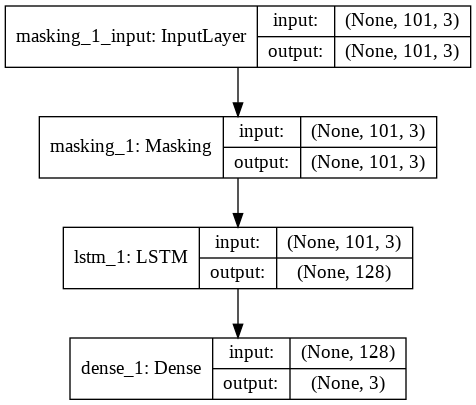

In [ ]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

#### Hyper parameters

In [ ]:
batch_size=7
epochs=10

#### Learning the model

In [ ]:
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Train on 21 samples, validate on 10 samples
Epoch 1/10
21/21 [==============================] - 1s 31ms/step - loss: 0.2249 - acc: 1.0000 - val_loss: 0.1300 - val_acc: 1.0000
Epoch 2/10
21/21 [==============================] - 1s 33ms/step - loss: 0.1152 - acc: 1.0000 - val_loss: 0.0747 - val_acc: 1.0000
Epoch 3/10
21/21 [==============================] - 1s 32ms/step - loss: 0.0675 - acc: 1.0000 - val_loss: 0.0460 - val_acc: 1.0000
Epoch 4/10
21/21 [==============================] - 1s 32ms/step - loss: 0.0417 - acc: 1.0000 - val_loss: 0.0306 - val_acc: 1.0000
Epoch 5/10
21/21 [==============================] - 1s 33ms/step - loss: 0.0289 - acc: 1.0000 - val_loss: 0.0211 - val_acc: 1.0000
Epoch 6/10
21/21 [==============================] - 1s 33ms/step - loss: 0.0221 - acc: 1.0000 - val_loss: 0.0150 - val_acc: 1.0000
Epoch 7/10
21/21 [==============================] - 1s 34ms/step - loss: 0.0165 - acc: 1.0000 - val_loss: 0.0112 - val_acc: 1.0000
Epoch 8/10
21/21 [=====================

### About result

#### Accuracy for test data

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.005141697824001312
Test accuracy: 1.0


#### Visualization of learning process

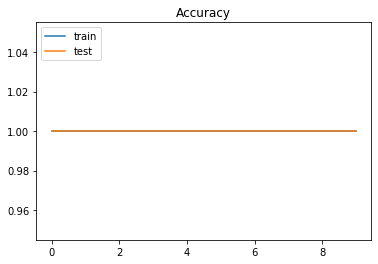

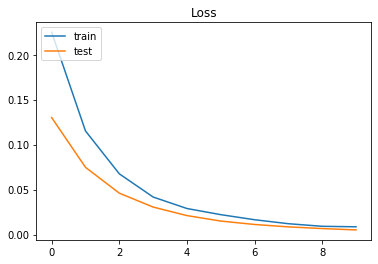

In [ ]:
# Plot transition of accuracy rate
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Plot loss transition
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

#### Confusion matrix for test data

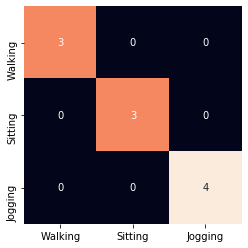

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cmx = confusion_matrix(y_test, np.argmax(model.predict(X_test), axis=1))
act_names = ["Walking", "Sitting", "Jogging"]
df_cmx = pd.DataFrame(cmx, index=act_names, columns=act_names)
sns.heatmap(df_cmx, annot=True, cbar=False, square=True, fmt="d")

# Examples for homework

## CNN

Use handjesture dataset( https://www.u-aizu.ac.jp/labs/is-pp/pplab/swr/sign_word_dataset.zip )

### About dataset

#### Data description

There were twenty isolated hand gestures (11 single-hand gestures and nine double hand gestures). The images of the dataset were collected with a pixel resolution of 200 × 200.

#### Loading data

In [ ]:
!wget https://www.u-aizu.ac.jp/labs/is-pp/pplab/swr/sign_word_dataset.zip
!unzip sign_word_dataset.zip

--2019-12-11 05:28:40--  https://www.u-aizu.ac.jp/labs/is-pp/pplab/swr/sign_word_dataset.zip
Resolving www.u-aizu.ac.jp (www.u-aizu.ac.jp)... 150.60.188.131
Connecting to www.u-aizu.ac.jp (www.u-aizu.ac.jp)|150.60.188.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 357719137 (341M) [application/zip]
Saving to: ‘sign_word_dataset.zip’

sign_word_dataset.z 100%[===================>] 341.15M  3.00MB/s    in 2m 10s  

2019-12-11 05:30:51 (2.62 MB/s) - ‘sign_word_dataset.zip’ saved [357719137/357719137]

Archive:  sign_word_dataset.zip
   creating: sign word dataset/Call/
  inflating: sign word dataset/Call/1.jpg  
  inflating: sign word dataset/Call/10.jpg  
  inflating: sign word dataset/Call/100.jpg  
  inflating: sign word dataset/Call/101.jpg  
  inflating: sign word dataset/Call/102.jpg  
  inflating: sign word dataset/Call/103.jpg  
  inflating: sign word dataset/Call/104.jpg  
  inflating: sign word dataset/Call/105.jpg  
  inflating: sign word dataset/

In [ ]:
import numpy as np
from PIL import Image
import os
import glob

dname = "sign word dataset"
target_names = [f for f in os.listdir(path=dname) if os.path.isdir(os.path.join(dname, f))]

X = []
y = []

img_size = (64, 64)

for i, target_name in enumerate(target_names):
  for fname in sorted(glob.glob(os.path.join(dname, target_name, "*.jpg")), key=lambda a: int(os.path.basename(a).split(".")[0])):
    X.append(np.array(Image.open(fname).resize(img_size), dtype="float32"))
    y.append(i)
X = np.array(X)
y = np.array(y)

#### View data

In [ ]:
print('X shape:', X.shape)
print(X.shape[0], 'samples')
print("Gesture types:")
print(target_names)

X shape: (18000, 64, 64, 3)
18000 samples
ジェスチャーの種類:
['Yes', 'Wash', 'Help', 'Correct', 'Please', 'Love', 'Work', 'Single', 'Sit', 'ILoveYou', 'You', 'Home', 'Ok', 'Fine', 'Like', 'Tall', 'Call', 'No', 'Close', 'Cold']


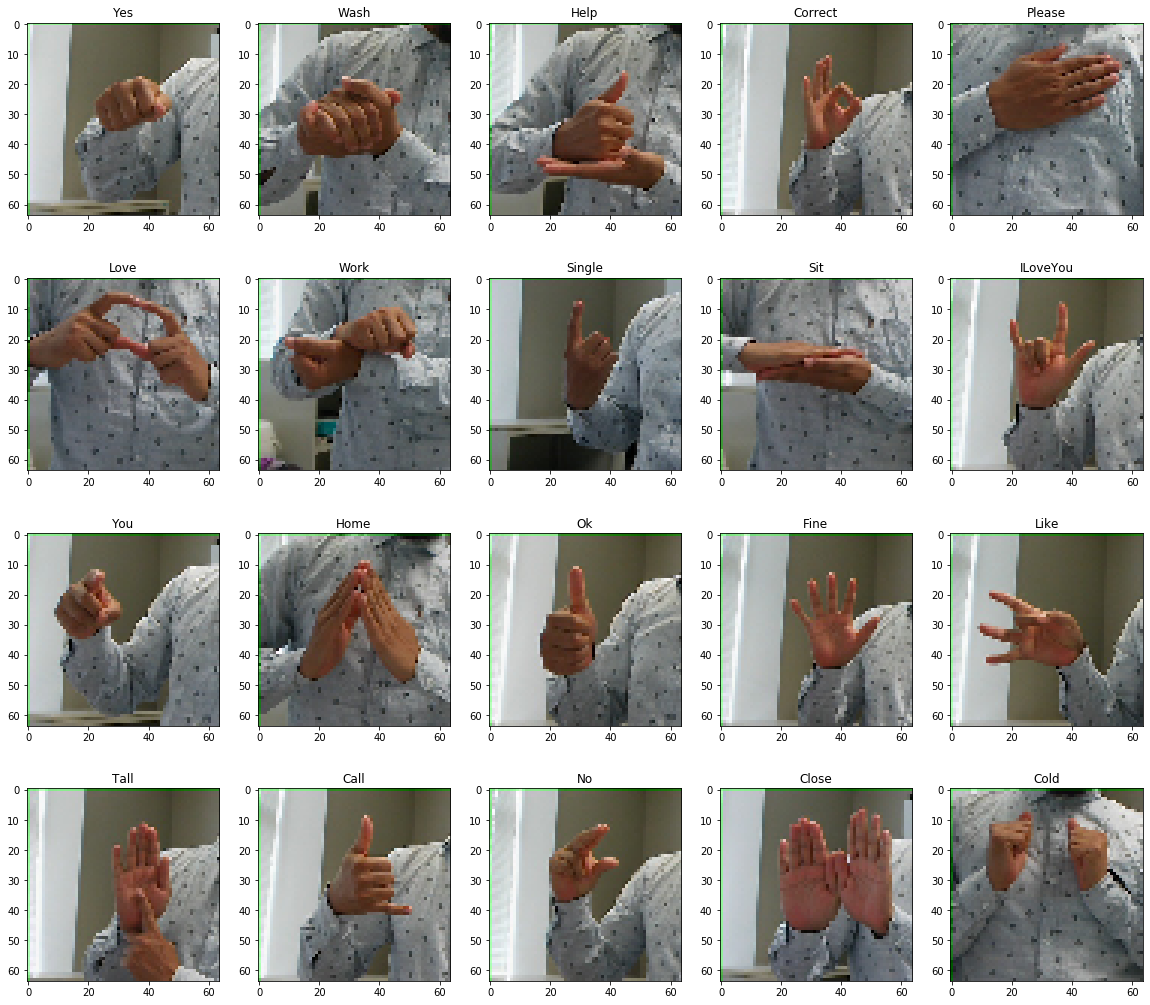

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 18))
for i in range(len(target_names)):
  ax = fig.add_subplot(4, 5, i+1)
  ax.imshow(X[y.tolist().index(i)].astype(int))
  ax.set_title(target_names[i])

#### Data normalization

In [ ]:
X /= 255

In [ ]:
from keras import backend as K
img_rows, img_cols, img_channels = X.shape[1:]
if K.image_data_format() == 'channels_first':
    X = X.reshape(X.shape[0], img_channels, img_rows, img_cols)
    input_shape = (img_channels, img_rows, img_cols)
else:
    X = X.reshape(X.shape[0], img_rows, img_cols, img_channels)
    input_shape = (img_rows, img_cols, img_channels)

Using TensorFlow backend.


#### Split into training and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### About the model

#### Parameters

In [ ]:
batch_size = 128
num_classes = len(target_names)
epochs = 100

#### Model creation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adadelta
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer="Adadelta",
              metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




#### Model visualization

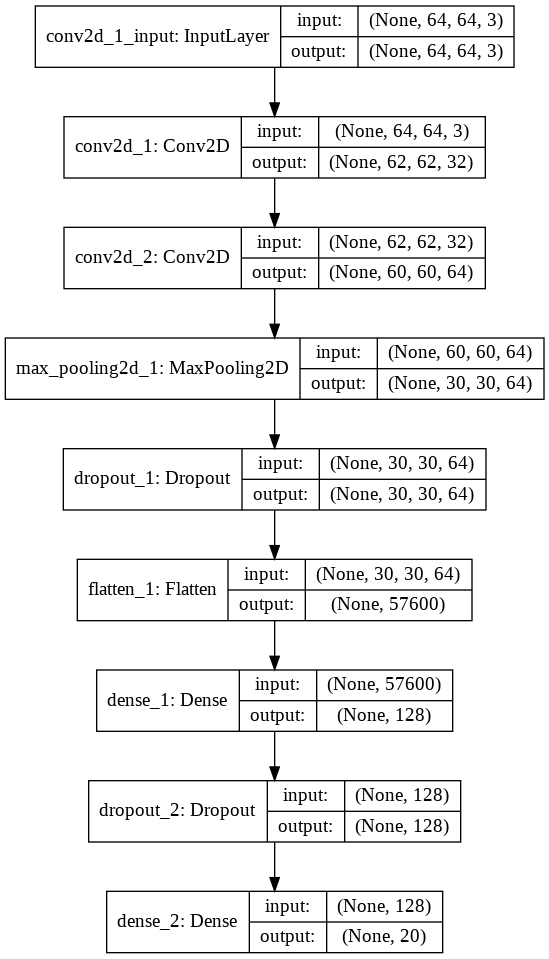

In [ ]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

#### Learning the model

In [ ]:
hist = model.fit(X_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 13500 samples, validate on 4500 samples
Epoch 1/12





13500/13500 [==============================] - 11s 812us/step - loss: 2.3292 - acc: 0.3170 - val_loss: 0.2499 - val_acc: 0.9262
Epoch 2/12
13500/13500 [==============================] - 3s 215us/step - loss: 0.2647 - acc: 0.9181 - val_loss: 0.0152 - val_acc: 0.9978
Epoch 3/12
13500/13500 [==============================] - 3s 215us/step - loss: 0.0741 - acc: 0.9777 - val_loss: 0.0023 - val_acc: 0.9993
Epoch 4/12
13500/13500 [==============================] - 3s 215us/step - loss: 0.0467 - acc: 0.9845 - val_loss: 4.0542e-04 - val_acc: 1.0000
Epoch 5/12
13500/13500 [==============================] - 3s 215us/step - loss: 0.0336 - acc: 0.9887 - val_loss: 8.5714e-04 - val_acc: 0.9996
Epoch 6/12
13500/13500 [==============================] - 3s 216us/step - loss: 0.0252 - acc: 0.9910 - val_loss: 2.5158e-04 - val_acc: 1.0000
Epoch 7/

### About result

#### Accuracy for test data

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.00015690436756631243
Test accuracy: 1.0


#### Visualization of learning process

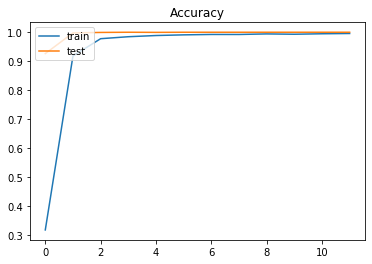

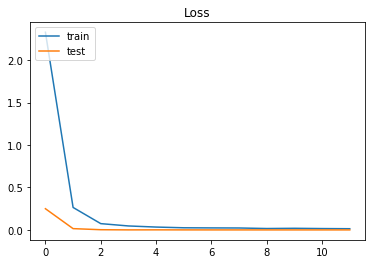

In [ ]:
# Plot transition of accuracy rate
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Plot loss transition
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

#### Confusion matrix for test data

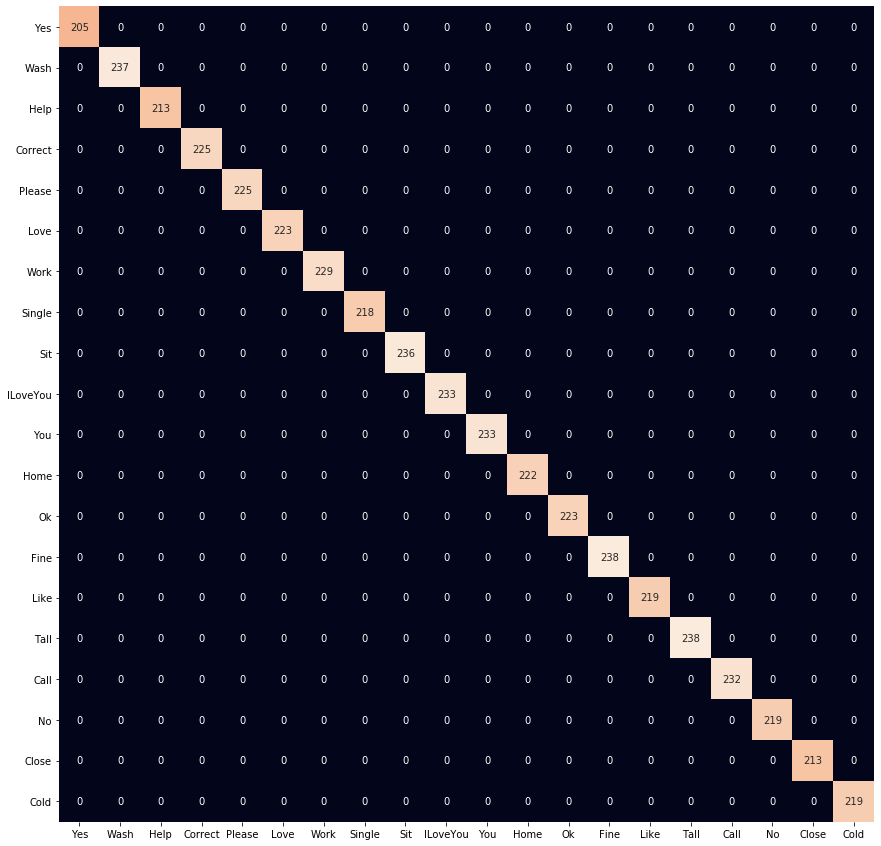

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predicted = np.argmax(model.predict(X_test), axis=1)
cmx = confusion_matrix(y_test, predicted)
df_cmx = pd.DataFrame(cmx, index=target_names, columns=target_names)
plt.figure(figsize = (15,15))
sns.heatmap(df_cmx, annot=True, cbar=False, square=True, fmt="d")

## RNN

### About dataset

#### Data description

Classify characters using character data obtained by the pen tablet.<br>
Here, the character data is time-series data and has the position information of the pen tip at a certain point in time。<br>
While image character data is offline character, this time-series character data is called online character.<br>
Use HandDB_SOC_Number.zip for the data to use. When this ZIP file is decompressed, character data is recorded in the format HandDB_SOC_Number / <character code> / \ <writer-id> _ <character code> .soc, and each soc file is recorded with a comma The first line contains the header that shows the feature name, and the second and subsequent lines contain the actual data.<br>
Here we classify online characters using LSTM.


#### Loading data

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1annxrMLs6srAaImNNi8or9DFJfsguXSc" -O HandDB_SOC_Number.zip
!unzip HandDB_SOC_Number.zip

--2019-12-12 06:25:14--  https://drive.google.com/uc?export=download&id=1annxrMLs6srAaImNNi8or9DFJfsguXSc
Resolving drive.google.com (drive.google.com)... 74.125.203.139, 74.125.203.101, 74.125.203.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.203.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c6thm84mmgmm5ekes3iuq391hl0mhcm3/1576130400000/12360162376384578551/*/1annxrMLs6srAaImNNi8or9DFJfsguXSc?e=download [following]
--2019-12-12 06:25:20--  https://doc-10-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c6thm84mmgmm5ekes3iuq391hl0mhcm3/1576130400000/12360162376384578551/*/1annxrMLs6srAaImNNi8or9DFJfsguXSc?e=download
Resolving doc-10-3c-docs.googleusercontent.com (doc-10-3c-docs.googleusercontent.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to doc-10-3c-docs.googleusercontent.com (doc-10

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib

import csv
import os
import glob

     |████████████████████████████████| 4.1MB 2.7MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.0.5-cp36-none-any.whl size=4118721 sha256=576f42c5787eaf7418fba25d50cec856c5890767237a31912a46d18cf244111c
  Stored in directory: /root/.cache/pip/wheels/6c/8a/08/4a784957da9f3c2b4839b4986be2fba2a481877318948be52c
Successfully built japanize-matplotlib


In [ ]:
target_list = list(range(65296, 65306))
target_names = [chr(code) for code in target_list]
X = []
y = []
X_length = []
for i, target_dir in enumerate(target_list):
  for path in sorted(glob.glob(os.path.join("HandDB_SOC_Number", str(target_dir), "*.soc"))):
    data = []
    with open(path) as f:
      reader = csv.reader(f)
      header = next(reader)
      for row in reader:
        data.append([int(d) for d in row])
    X.append(data)
    y.append(i)
    X_length.append(len(data))

In [ ]:
max_length = max(X_length)
max_length

145

In [ ]:
def trp(l, n, padding=-1):
  return l[:n] + [[padding]*len(l[0])]*(n-len(l))

In [ ]:
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [ ]:
# sequence.pad_sequences(x_train, maxlen=maxlen)
# X = np.array(list(map(lambda a: trp(a, max_length, padding=-1), X)))
X = pad_sequences(X, maxlen=max_length, padding='post', value=-1)
y = np.array(y)
X_length = np.array(X_length)

In [ ]:
mask = ~(X_length==1)
X = X[mask]
y = y[mask]
X_length = X_length[mask]

#### View data

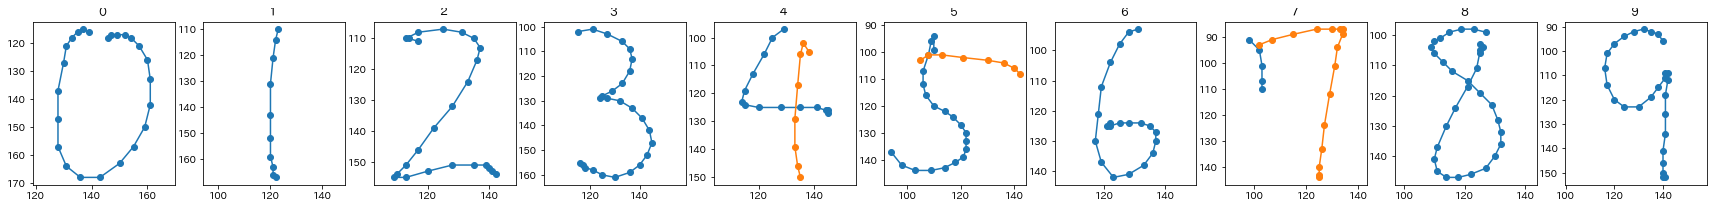

In [ ]:
fig = plt.figure(figsize=(30, 3))
for i in range(max(y)+1):
  ax = fig.add_subplot(1, 10, i+1)
  data = X[y.tolist().index(i)]
  n_stroke = data[:, 0].max()
  for i_stroke in range(n_stroke+1):
    ax.plot(*data[data[:, 0]==i_stroke][:, [1, 2]].T, marker='o')
  ax.set_aspect('equal', 'datalim')
  ax.invert_yaxis()
  ax.set_title(chr(target_list[i]))
plt.show()

(array([ 44.,  40.,  76., 242., 199., 197., 118.,  72.,  68.,  25.,  32.,
         21.,   6.,   8.,   4.,   2.,   4.,   2.,   5.,   2.,   2.,   2.,
          2.,   1.,   0.,   2.,   0.,   0.,   0.,   1.]),
 array([  7. ,  11.6,  16.2,  20.8,  25.4,  30. ,  34.6,  39.2,  43.8,
         48.4,  53. ,  57.6,  62.2,  66.8,  71.4,  76. ,  80.6,  85.2,
         89.8,  94.4,  99. , 103.6, 108.2, 112.8, 117.4, 122. , 126.6,
        131.2, 135.8, 140.4, 145. ]),
 <a list of 30 Patch objects>)

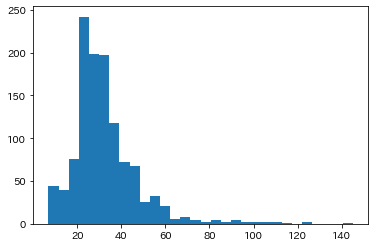

In [ ]:
# Data length distribution
plt.hist(X_length, bins=30)

#### Data split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, X_length_train, X_length_test = train_test_split(X, y, X_length, test_size=0.20, random_state=42)

In [ ]:
timesteps, features = X_train.shape[-2:]
num_classes = len(target_list)
print("Timesteps:", timesteps)
print("Features:", features)
print("# of Classes:", num_classes)

Timesteps: 145
Features: 3
# of Classes: 10


### About the model

#### Model creation

Bidirectional LSTM<br>
https://keras.io/examples/imdb_bidirectional_lstm/<br>
Stacked LSTM<br>
https://keras.io/getting-started/sequential-model-guide/#stacked-lstm-for-sequence-classification<br>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding, Masking
from keras.layers import LSTM, Bidirectional
import tensorflow as tf

model = tf.keras.Sequential()
model.add(Masking(mask_value=-1., input_shape=(timesteps, features)))

# Simple LSTM
# batch_size 64, epochs 100, test acc 0.94
# batch_size 128, epochs 200, test acc 0.96
model.add(tf.keras.layers.LSTM(128, return_sequences=False, recurrent_dropout=0.5))

# Bidirectional LSTM
# batch_size 64, epochs 100, test acc 0.95
# batch_size 128, epochs 200, test acc 0.96
# model.add(Bidirectional(LSTM(128, return_sequences=False, recurrent_dropout=0.5)))

# Stacking LSTM
# batch_size 64, epochs 100, test acc 0.97
# batch_size 128, epochs 200, test acc 0.97 Training accuracy almost 100%
# model.add(LSTM(128, return_sequences=True, recurrent_dropout=0.5))
# model.add(LSTM(128, return_sequences=False, recurrent_dropout=0.5))

# Stacking Bidirectional LSTM
# batch_size 64, epochs 100, test acc 0.97
# model.add(Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.5)))
# model.add(LSTM(128, return_sequences=False, recurrent_dropout=0.5))

# Stacking Bidirectional LSTM
# batch_size 64, epochs 100, test acc 0.97
# Training loss is very low, but it doesn't fall for the test
# barch_size 128, epochs 200, test acc 0.96
# Training loss was very low, but not low for the test
# model.add(Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.5)))
# model.add(Bidirectional(LSTM(128, return_sequences=False, recurrent_dropout=0.5)))
# model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              # optimizer='adam',  # low accuracy
              metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




#### Model visualization

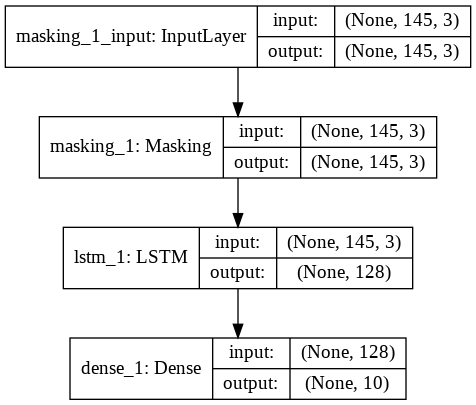

In [ ]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

#### Hyperparameters

In [ ]:
batch_size = 128
epochs = 200

#### Learning the model

In [ ]:
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))




Train on 941 samples, validate on 236 samples
Epoch 1/200





941/941 [==============================] - 7s 7ms/step - loss: 2.1653 - acc: 0.2147 - val_loss: 1.9631 - val_acc: 0.3814
Epoch 2/200
941/941 [==============================] - 2s 2ms/step - loss: 1.9368 - acc: 0.3741 - val_loss: 1.8554 - val_acc: 0.4280
Epoch 3/200
941/941 [==============================] - 2s 2ms/step - loss: 1.8399 - acc: 0.4134 - val_loss: 1.7870 - val_acc: 0.4746
Epoch 4/200
941/941 [==============================] - 2s 2ms/step - loss: 1.7606 - acc: 0.4548 - val_loss: 1.6847 - val_acc: 0.4746
Epoch 5/200
941/941 [==============================] - 2s 2ms/step - loss: 1.6905 - acc: 0.4633 - val_loss: 1.6394 - val_acc: 0.4873
Epoch 6/200
941/941 [==============================] - 2s 2ms/step - loss: 1.6228 - acc: 0.5112 - val_loss: 1.5663 - val_acc: 0.5551
Epoch 7/200
941/941 [==============================] - 2s 2ms/step - loss: 1.5668 - acc: 0.5515 - val_loss: 1.5153 - val_acc: 0.5424
Epoch 8/200
941

### About result

#### Evaluation of test data

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18486733014805842
Test accuracy: 0.9533898305084746


#### Visualize the learning process

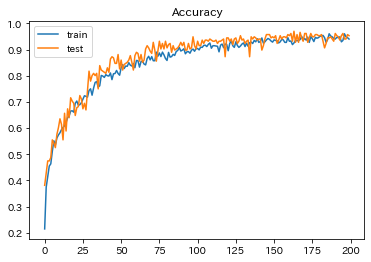

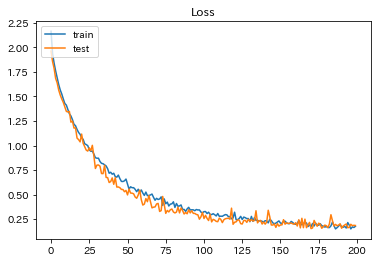

In [ ]:
# Plot transition of accuracy rate
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Plot loss transition
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

#### Confusion matrix for test data

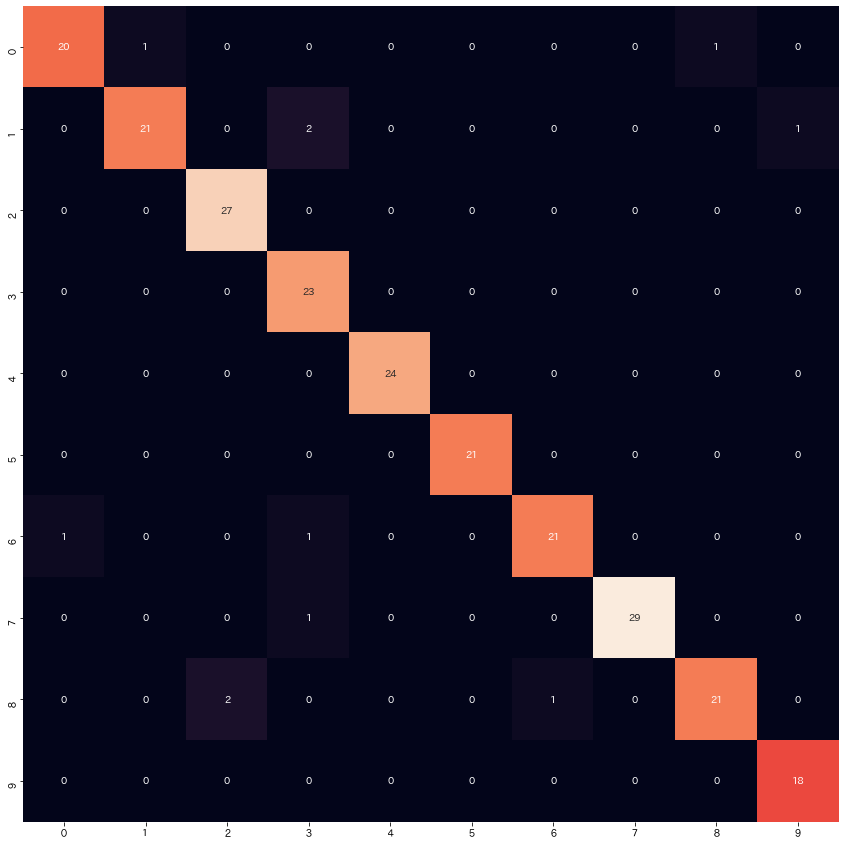

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predicted = np.argmax(model.predict(X_test), axis=1)
cmx = confusion_matrix(y_test, predicted)
df_cmx = pd.DataFrame(cmx, index=target_names, columns=target_names)
plt.figure(figsize = (15,15))
sns.heatmap(df_cmx, annot=True, cbar=False, square=True, fmt="d")

#### Visualize wrong data

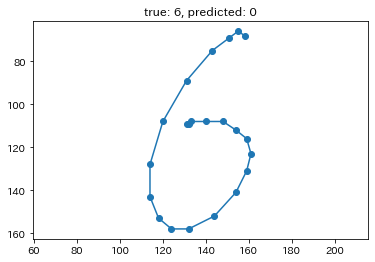

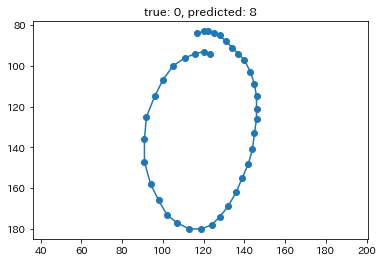

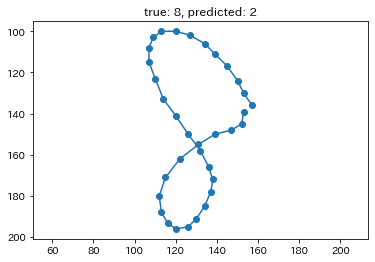

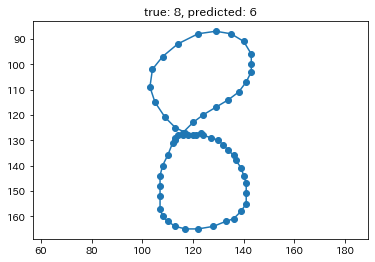

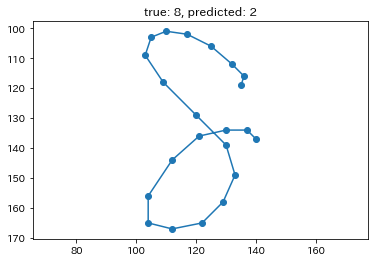

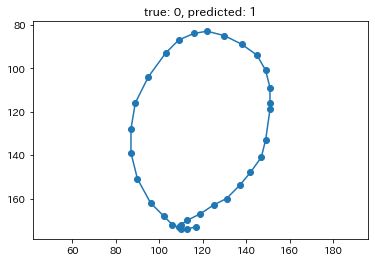

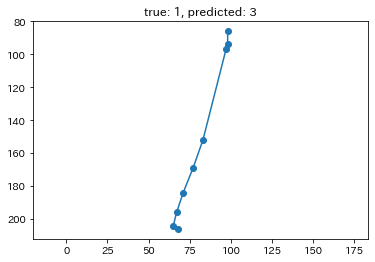

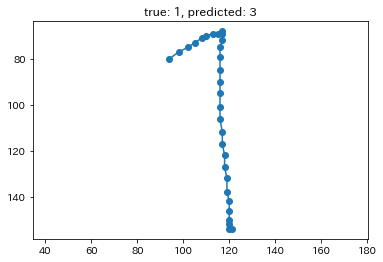

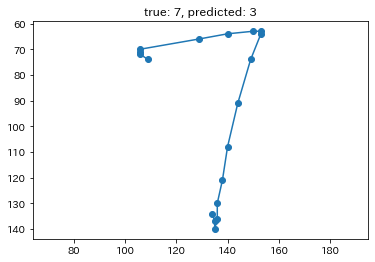

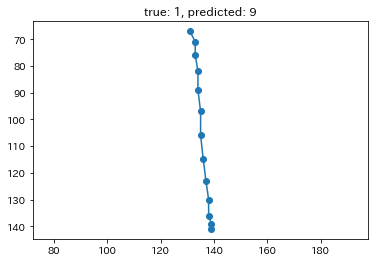

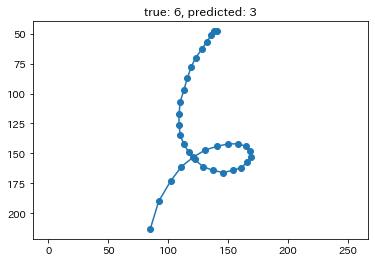

In [ ]:
mask = y_test != predicted
for data, label, pred, length in zip(X_test[mask], y_test[mask], predicted[mask], X_length_test[mask]):
  n_stroke = data[:, 0].max()
  for i_stroke in range(n_stroke+1):
    plt.plot(*data[data[:, 0]==i_stroke][:, [1, 2]].T, marker='o')
  plt.gca().set_aspect('equal', 'datalim')
  plt.gca().invert_yaxis()
  plt.title(f"true: {label}, predicted: {pred}")
  plt.show()

## CNN + RNN

### About dataset

#### Data description

Classify characters using character data obtained by the pen tablet.<br>
Here, the character data is time-series data and has the position information of the pen tip at a certain point in time。<br>
While image character data is offline character, this time-series character data is called online character.<br>
Use HandDB_SOC_Number.zip for the data to use. When this ZIP file is decompressed, character data is recorded in the format HandDB_SOC_Number / <character code> / \ <writer-id> _ <character code> .soc, and each soc file is recorded with a comma The first line contains the header that shows the feature name, and the second and subsequent lines contain the actual data.<br>
Here, online characters are converted to offline characters, online characters are extracted using LSTM, and offline characters are extracted using CNN, and a model is created by combining LSTM and CNN on the way.

#### Loading data

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1annxrMLs6srAaImNNi8or9DFJfsguXSc" -O HandDB_SOC_Number.zip
!unzip HandDB_SOC_Number.zip

--2019-12-12 06:28:09--  https://drive.google.com/uc?export=download&id=1annxrMLs6srAaImNNi8or9DFJfsguXSc
Resolving drive.google.com (drive.google.com)... 74.125.20.100, 74.125.20.138, 74.125.20.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c6thm84mmgmm5ekes3iuq391hl0mhcm3/1576130400000/12360162376384578551/*/1annxrMLs6srAaImNNi8or9DFJfsguXSc?e=download [following]
--2019-12-12 06:28:16--  https://doc-10-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c6thm84mmgmm5ekes3iuq391hl0mhcm3/1576130400000/12360162376384578551/*/1annxrMLs6srAaImNNi8or9DFJfsguXSc?e=download
Resolving doc-10-3c-docs.googleusercontent.com (doc-10-3c-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc-10-3c-docs.googleusercontent.com (doc-10-3c-d

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib

import csv
import os
import glob

     |████████████████████████████████| 4.1MB 2.5MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.0.5-cp36-none-any.whl size=4118721 sha256=62f41a485bc09a0f08ff64aaeabadf78ab3cf67f81f1acf960f372a4b5812e3d
  Stored in directory: /root/.cache/pip/wheels/6c/8a/08/4a784957da9f3c2b4839b4986be2fba2a481877318948be52c
Successfully built japanize-matplotlib


In [ ]:
target_list = list(range(65296, 65306))
target_names = [chr(code) for code in target_list]
X = []
y = []
X_length = []
for i, target_dir in enumerate(target_list):
  for path in sorted(glob.glob(os.path.join("HandDB_SOC_Number", str(target_dir), "*.soc"))):
    data = []
    with open(path) as f:
      reader = csv.reader(f)
      header = next(reader)
      for row in reader:
        data.append([int(d) for d in row])
    X.append(data)
    y.append(i)
    X_length.append(len(data))

In [ ]:
max_length = max(X_length)
max_length

145

In [ ]:
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [ ]:
X = pad_sequences(X, maxlen=max_length, value=-1, padding="post")
y = np.array(y)
X_length = np.array(X_length)

In [ ]:
timesteps, features = X.shape[-2:]
num_classes = len(target_list)
print("Timesteps:", timesteps)
print("Features:", features)
print("# of Classes:", num_classes)

Timesteps: 145
Features: 3
# of Classes: 10


#### Image data creation

In [ ]:
import io
import cv2

In [ ]:
def get_img_from_fig(fig, dpi=64):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=dpi)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = 255 - img
    return img

In [ ]:
def get_img_from_data(data, dpi=64, linewidth=3):
  fig = plt.figure(figsize=(1, 1))
  n_stroke = data[:, 0].max()
  for i_stroke in range(n_stroke+1):
    plt.plot(*data[data[:, 0]==i_stroke][:, [1, 2]].T, color="black", linewidth=linewidth)
  plt.gca().set_aspect('equal', 'datalim')
  plt.gca().invert_yaxis()
  plt.axis('off')
  img = get_img_from_fig(fig, dpi)
  plt.close()
  return img

In [ ]:
X_images = np.array([get_img_from_data(a, dpi=32, linewidth=3) for a in X], dtype=np.float64)

In [ ]:
img_rows, img_cols = X_images.shape[1:]
img_channels = 1
print("row:", img_rows)
print("col:", img_cols)

row: 32
col: 32


#### View data

Text(0.5, 0.98, 'label: 9')

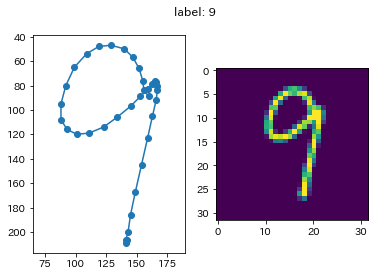

In [ ]:
index = 1100
fig, (axL, axR) = plt.subplots(ncols=2)
data = X[index]
n_stroke = data[:, 0].max()
for i_stroke in range(n_stroke+1):
  axL.plot(*data[data[:, 0]==i_stroke][:, [1, 2]].T, marker='o')
axL.set_aspect('equal', 'datalim')
axL.invert_yaxis()
axR.imshow(X_images[index].reshape(img_rows, img_cols))
fig.suptitle(f"label: {y[index]}")

#### Normalization of image data

In [ ]:
X_images /= 255

In [ ]:
from keras import backend as K
if K.image_data_format() == 'channels_first':
    X_images = X_images.reshape(X_images.shape[0], img_channels, img_rows, img_cols)
    input_shape = (img_channels, img_rows, img_cols)
else:
    X_images = X_images.reshape(X_images.shape[0], img_rows, img_cols, img_channels)
    input_shape = (img_rows, img_cols, img_channels)

#### Data split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, X_img_train, X_img_test, y_train, y_test, X_length_train, X_length_test = train_test_split(X, X_images, y, X_length, test_size=0.20, random_state=42)

### About CNN

#### Model creation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adadelta
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




#### Hyperparameters

In [ ]:
batch_size = 128
epochs = 12

#### Learning the model

In [ ]:
model.fit(X_img_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_img_test, y_test))

Train on 944 samples, validate on 236 samples
Epoch 1/12
944/944 [==============================] - 0s 227us/step - loss: 0.0208 - acc: 0.9926 - val_loss: 0.2326 - val_acc: 0.9534
Epoch 2/12
944/944 [==============================] - 0s 209us/step - loss: 0.0268 - acc: 0.9926 - val_loss: 0.1866 - val_acc: 0.9661
Epoch 3/12
944/944 [==============================] - 0s 189us/step - loss: 0.0323 - acc: 0.9852 - val_loss: 0.1848 - val_acc: 0.9576
Epoch 4/12
944/944 [==============================] - 0s 182us/step - loss: 0.0165 - acc: 0.9958 - val_loss: 0.1778 - val_acc: 0.9619
Epoch 5/12
944/944 [==============================] - 0s 176us/step - loss: 0.0127 - acc: 0.9968 - val_loss: 0.1788 - val_acc: 0.9661
Epoch 6/12
944/944 [==============================] - 0s 172us/step - loss: 0.0269 - acc: 0.9894 - val_loss: 0.1979 - val_acc: 0.9619
Epoch 7/12
944/944 [==============================] - 0s 174us/step - loss: 0.0152 - acc: 0.9968 - val_loss: 0.1986 - val_acc: 0.9746
Epoch 8/12
944/9

### About RNN

#### Model creation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding, Masking
from keras.layers import LSTM, Bidirectional

model =  tf.keras.Sequential()
model.add(tf.keras.layers.Masking(mask_value=-1., input_shape=(timesteps, features)))
# Simple LSTM
# batch_size 64, epochs 100, test acc 0.94
# batch_size 128, epochs 200, test acc 0.96
model.add(tf.keras.layers.LSTM(128, return_sequences=False, recurrent_dropout=0.5))
# Bidirectional LSTM
# batch_size 64, epochs 100, test acc 0.95
# batch_size 128, epochs 200, test acc 0.96
# model.add(Bidirectional(LSTM(128, return_sequences=False, recurrent_dropout=0.5)))
# Stacking LSTM
# batch_size 64, epochs 100, test acc 0.97
# batch_size 128, epochs 200, test acc 0.97 Training accuracy almost 100%
# model.add(LSTM(128, return_sequences=True, recurrent_dropout=0.5))
# model.add(LSTM(128, return_sequences=False, recurrent_dropout=0.5))
# Stacking Bidirectional LSTM
# batch_size 64, epochs 100, test acc 0.97
# model.add(Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.5)))
# model.add(LSTM(128, return_sequences=False, recurrent_dropout=0.5))
# Stacking Bidirectional LSTM
# batch_size 64, epochs 100, test acc 0.97
# Training loss is very low, but it doesn't fall for the test
# barch_size 128, epochs 200, test acc 0.96
# Training loss was very low, but not low for the test
# model.add(Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.5)))
# model.add(Bidirectional(LSTM(128, return_sequences=False, recurrent_dropout=0.5)))
# model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              # optimizer='adam',  # 精度が低かった
              metrics=['accuracy'])

#### Hyperparameters

In [ ]:
batch_size = 128
epochs = 200

#### Learning the model

In [ ]:
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Train on 944 samples, validate on 236 samples
Epoch 1/200
944/944 [==============================] - 4s 4ms/step - loss: 2.1992 - acc: 0.2595 - val_loss: 2.0001 - val_acc: 0.3729
Epoch 2/200
944/944 [==============================] - 3s 3ms/step - loss: 1.9321 - acc: 0.3835 - val_loss: 1.8846 - val_acc: 0.4195
Epoch 3/200
944/944 [==============================] - 3s 3ms/step - loss: 1.8400 - acc: 0.4163 - val_loss: 1.8148 - val_acc: 0.4110
Epoch 4/200
944/944 [==============================] - 3s 3ms/step - loss: 1.7782 - acc: 0.4163 - val_loss: 1.7586 - val_acc: 0.3898
Epoch 5/200
944/944 [==============================] - 3s 3ms/step - loss: 1.7172 - acc: 0.4629 - val_loss: 1.7020 - val_acc: 0.4237
Epoch 6/200
944/944 [==============================] - 3s 3ms/step - loss: 1.6753 - acc: 0.4544 - val_loss: 1.6574 - val_acc: 0.4746
Epoch 7/200
944/944 [==============================] - 3s 3ms/step - loss: 1.6309 - acc: 0.4650 - val_loss: 1.6170 - val_acc: 0.4492
Epoch 8/200
944/944 [==

### About CNN + RNN

#### Model creation

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Embedding, Masking
from keras.layers import concatenate
from keras.layers import LSTM, Bidirectional
from keras.optimizers import Adadelta
import tensorflow as tf

cnn_model = tf.keras.Sequential()
cnn_model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(tf.keras.layers.Dropout(0.25))
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tf.keras.layers.Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

lstm_model =  tf.keras.Sequential()
lstm_model.add(tf.keras.layers.Masking(mask_value=-1., input_shape=(timesteps, features)))
# Simple LSTM
lstm_model.add(tf.keras.layers.LSTM(128, return_sequences=False, recurrent_dropout=0.5))
# Bidirectional LSTM
# lstm_model.add(Bidirectional(LSTM(128, return_sequences=False, recurrent_dropout=0.5)))
# Stacking LSTM
# lstm_model.add(LSTM(128, return_sequences=True, recurrent_dropout=0.5))
# lstm_model.add(LSTM(128, return_sequences=False, recurrent_dropout=0.5))
# model.add(Dense(num_classes, activation='softmax'))

merged = tf.keras.layers.concatenate([cnn_model.output, lstm_model.output])
merged_model = tf.keras.layers.Dropout(0.5)(merged)
merged_model = tf.keras.layers.Dense(num_classes, activation="softmax")(merged_model)

model = tf.keras.Model([cnn_model.input, lstm_model.input], merged_model)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              # optimizer='rmsprop',
              metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




#### Model visualization

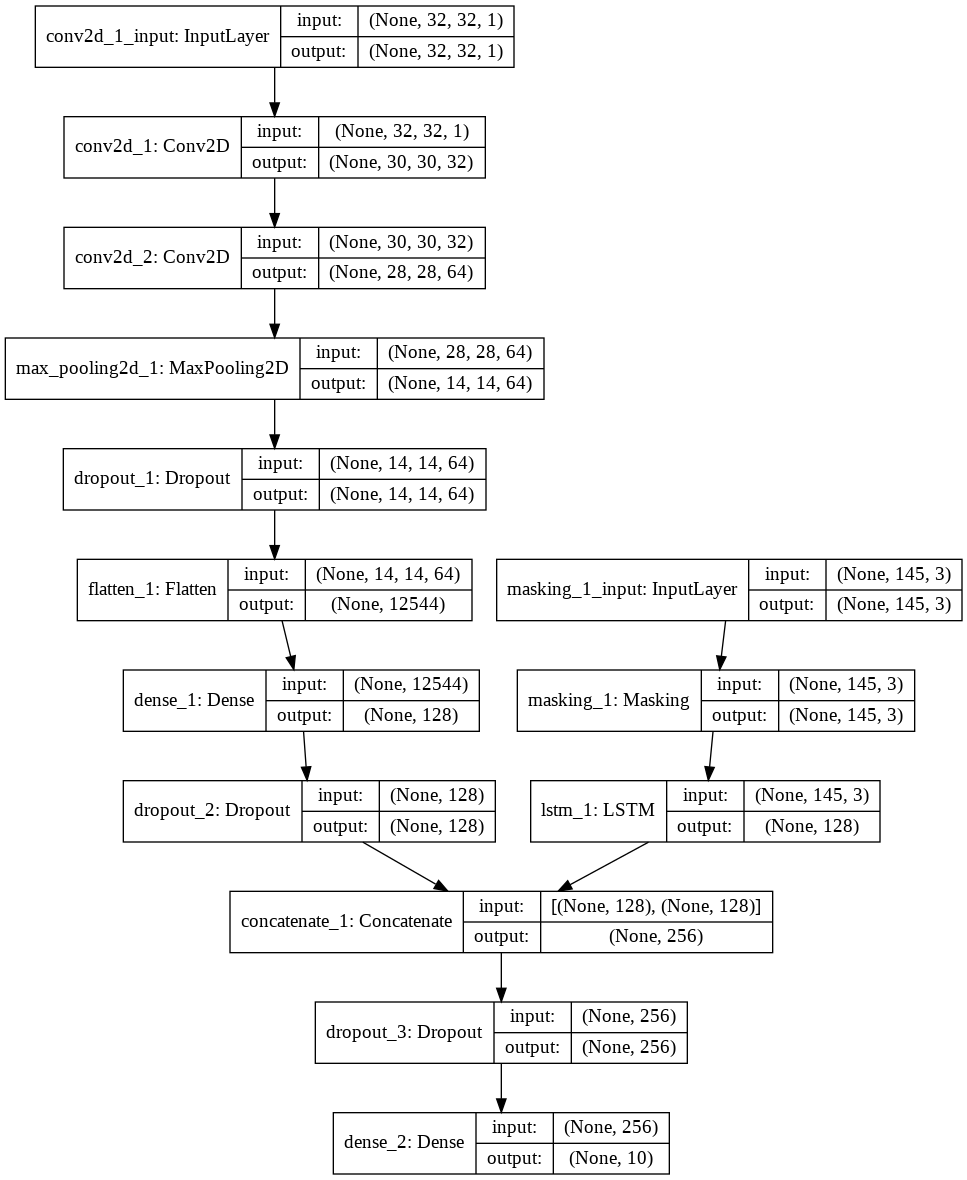

In [ ]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

#### Hyperparameters

In [ ]:
batch_size = 128
epochs = 25

#### Learning the model

In [ ]:
hist = model.fit([X_img_train, X_train], y_train, batch_size=batch_size, epochs=epochs, validation_data=([X_img_test, X_test], y_test))




Train on 944 samples, validate on 236 samples
Epoch 1/25





944/944 [==============================] - 10s 11ms/step - loss: 2.0987 - acc: 0.2648 - val_loss: 1.2798 - val_acc: 0.6144
Epoch 2/25
944/944 [==============================] - 2s 2ms/step - loss: 1.2156 - acc: 0.6038 - val_loss: 0.8465 - val_acc: 0.7161
Epoch 3/25
944/944 [==============================] - 2s 2ms/step - loss: 0.7973 - acc: 0.7458 - val_loss: 0.3581 - val_acc: 0.9025
Epoch 4/25
944/944 [==============================] - 2s 2ms/step - loss: 0.5853 - acc: 0.8083 - val_loss: 0.3707 - val_acc: 0.8898
Epoch 5/25
944/944 [==============================] - 2s 2ms/step - loss: 0.5218 - acc: 0.8432 - val_loss: 0.2187 - val_acc: 0.9407
Epoch 6/25
944/944 [==============================] - 2s 2ms/step - loss: 0.4395 - acc: 0.8602 - val_loss: 0.1905 - val_acc: 0.9407
Epoch 7/25
944/944 [==============================] - 2s 2ms/step - loss: 0.3516 - acc: 0.8888 - val_loss: 0.1952 - val_acc: 0.9364
Epoch 8/25
944/944 [

### About result

#### Evaluation of test data

In [ ]:
score = model.evaluate([X_img_test, X_test], y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1253827378406363
Test accuracy: 0.9745762721966889


#### Visualize the learning process

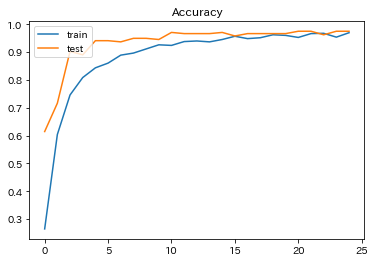

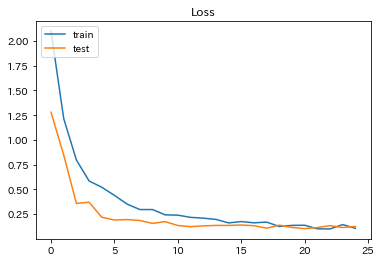

In [ ]:
# Plot transition of accuracy rate
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Plot loss transition
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

#### Confusion matrix for test data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


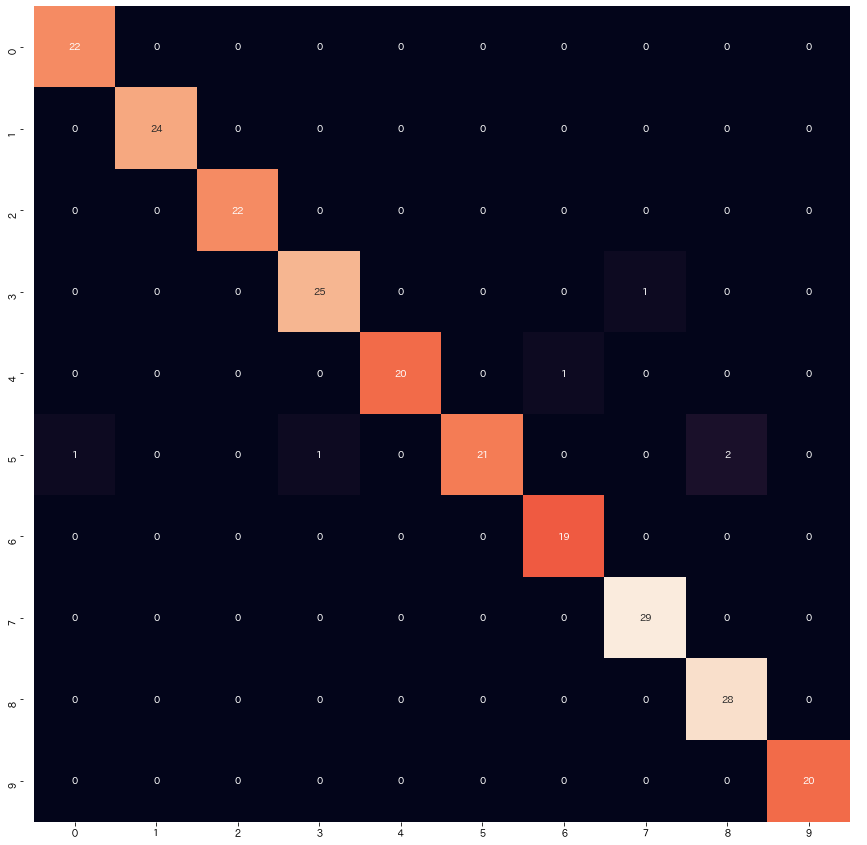

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predicted = np.argmax(model.predict([X_img_test, X_test]), axis=1)
cmx = confusion_matrix(y_test, predicted)
df_cmx = pd.DataFrame(cmx, index=target_names, columns=target_names)
plt.figure(figsize = (15,15))
sns.heatmap(df_cmx, annot=True, cbar=False, fmt="d")
plt.axes().set_aspect('equal', 'datalim')

#### Visualize wrong data

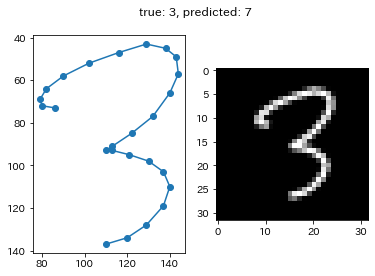

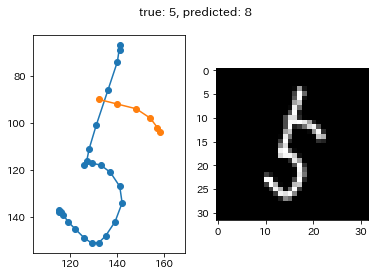

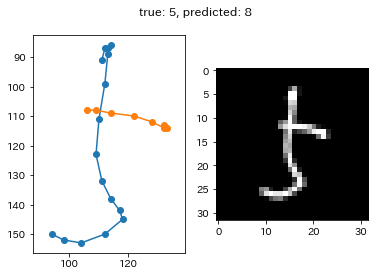

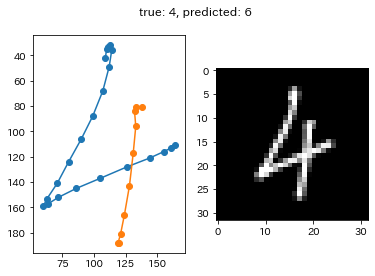

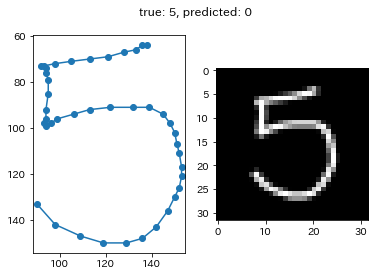

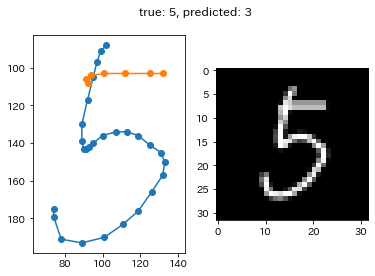

In [ ]:
mask = y_test != predicted
for img, data, label, pred, length in zip(X_img_test[mask], X_test[mask], y_test[mask], predicted[mask], X_length_test[mask]):
  fig, (axL, axR) = plt.subplots(ncols=2)
  n_stroke = data[:, 0].max()
  for i_stroke in range(n_stroke+1):
    axL.plot(*data[data[:, 0]==i_stroke][:, [1, 2]].T, marker='o')
  axL.set_aspect('equal', 'datalim')
  axL.invert_yaxis()
  axR.imshow(img.reshape(img.shape[0], img.shape[1]), cmap="gray")
  fig.suptitle(f"true: {label}, predicted: {pred}")
  plt.show()

## FFT + CNN

Performs writer authentication (Signature Verification) using SVC2004 signature data.<br>
Here, as the data to be used, online character data is converted into image data of a spectrogram and used.<br>
In writer authentication, a model is created for each user, and binary classification is performed between the user and others

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import re
import glob

from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


### About dataset

#### Explanation of SVC2004

This data set contains signature data collected from
40 users.  For each user, there are 20 genuine signatures and
20 skilled forgeries.

Each genuine/forgery signature is stored in a separate text file.
The file names are in the format "UxSy.txt", where x (1..40)
indicates the user and y (1..40) indicates one signature instance
of the corresponding user, with the first 20 (1..20) representing
genuine signatures and the rest (21..40) representing skilled
forgeries provided by the other users.

In each text file, the signature is simply represented as a
sequence of points.  The first line store the feature name.  Each of the
subsequent lines corresponds to one point characterized by 5
features listed in the following order:

  * Stroke Number - current stroke number (if -1, pen-up state)
  * X-coordinate  - scaled cursor position along the x-axis
  * Y-coordinate  - scaled cursor position along the y-axis
  * Time stamp    - system time at which the event was posted
  * Button status - current button status (0 for pen-up and 1 for pen-down)

#### Download data

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1k9E23KYCMELX38WCkGPtwwWb1s855xpD" -O SVC2004_SOC.zip
!unzip SVC2004_SOC.zip

--2019-12-12 06:29:34--  https://drive.google.com/uc?export=download&id=1k9E23KYCMELX38WCkGPtwwWb1s855xpD
Resolving drive.google.com (drive.google.com)... 108.177.11.138, 108.177.11.100, 108.177.11.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.11.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d582uj7rmc43m9vs15r8dg3hjn3d28vd/1576130400000/12360162376384578551/*/1k9E23KYCMELX38WCkGPtwwWb1s855xpD?e=download [following]
--2019-12-12 06:29:47--  https://doc-0s-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d582uj7rmc43m9vs15r8dg3hjn3d28vd/1576130400000/12360162376384578551/*/1k9E23KYCMELX38WCkGPtwwWb1s855xpD?e=download
Resolving doc-0s-3c-docs.googleusercontent.com (doc-0s-3c-docs.googleusercontent.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to doc-0s-3c-docs.googleusercontent.com (doc-0

#### Loading data

The data uses only Task1.

In [ ]:
files = glob.glob(os.path.join("SVC2004_SOC", "Task1", "*.soc"))
files = sorted(files, key = lambda x: [int(i) for i in re.fullmatch('^U(\d+)S(\d+).soc$', os.path.basename(x)).groups()])
X = []
user = []
genuine = []
X_length = []
for file_path in files:
  try:
    data = pd.read_csv(file_path)
    data = data.loc[data["stroke_num"]>=0]
    data.loc[:, "time"] -= data.iloc[0].loc["time"]
    u_g = [int(i) for i in re.fullmatch('^U(\d+)S(\d+).soc$', os.path.basename(file_path)).groups()]
    X.append(data.loc[:, ["stroke_num", "x", "y", "time"]].values)
    user.append(u_g[0])
    genuine.append(1 if u_g[1] < 21 else 0)
    X_length.append(len(data))
  except Exception as e:
    print(e, file_path)
    print(data)

In [ ]:
max_length = max(X_length)
num_user = max(user)

In [ ]:
user = np.array(user)
genuine = np.array(genuine)
X_length = np.array(X_length)

#### Creating a spectrogram

Create a spectrogram by short-time Fourier transform of writing speed。<br>
As the writing speed, the speed on the horizontal axis, the speed on the vertical axis, and the speed on the plane are used, and a short-time Fourier transform is applied to each of them to obtain an RGB image of a spectrogram.

##### Prepare functions to get speed and frequency

In [ ]:
# Function to get frequency
def get_freq(data):
  N = len(data)
  freq = np.fft.fft(data)
  return np.abs(freq)[1:int(N/2+0.5)]

In [ ]:
# Function to get the change of each speed and time
def get_velocity(data):
  num_index = max(data[:, 0])
  x_vel = []
  y_vel = []
  xy_vel = []
  t_diff = []
  for i in range(num_index+1):
    stroke_data = data[data[:, 0]==i]
    if len(stroke_data) == 1:
      x_vel.append(0)
      y_vel.append(0)
      xy_vel.append(0)
      t_diff.append(0.01)
    else:
      time_diff = np.ediff1d(stroke_data[:, 3]*0.001)
      time_diff = np.append([time_diff.mean()], time_diff)
      stroke_data = stroke_data[time_diff!=0]
      time_diff = time_diff[time_diff!=0]
      x_diff = np.ediff1d(stroke_data[:, 1], to_begin=0) / time_diff
      y_diff = np.ediff1d(stroke_data[:, 2], to_begin=0) / time_diff
      diff = np.array([np.linalg.norm(stroke_data[i] - stroke_data[i-1]) for i in range(1, len(stroke_data))])
      diff = np.append([0], diff) / time_diff
      x_vel.extend(x_diff)
      y_vel.extend(y_diff)
      xy_vel.extend(diff)
      t_diff.extend(time_diff)
  return np.array(x_vel), np.array(y_vel), np.array(xy_vel), np.array(t_diff)

##### Extract spectrogram

In [ ]:
def get_velocity_sft(data, n_window=50):
  x_vel, y_vel, xy_vel, t_diff = get_velocity(data)
  dt = np.mean(t_diff)
  d_len = len(t_diff)
  amps = []
  for i in range(n_window, d_len):
    vel_tmp = xy_vel[i-n_window:i]
    amp = np.array([get_freq(x_vel[i-n_window:i]), get_freq(y_vel[i-n_window:i]), get_freq(xy_vel[i-n_window:i])]).T
    amps.append(amp)
  freq = np.fft.fftfreq(n_window, dt)[1:int(n_window/2+0.5)]
  return np.array(amps), freq

In [ ]:
X_freqs = []
n_window=50
for data in X:
  spectrogram, freq = get_velocity_sft(data, n_window=n_window)
  X_freqs.append(spectrogram)

#### View data

In [ ]:
def plot_character(data):
  n_stroke = max(data[:, 0]) + 1
  for i in range(n_stroke):
    stroke = data[data[:, 0]==i]
    plt.plot(stroke[:, 1], stroke[:, 2], marker="o")

In [ ]:
def plot_spectrogram(spectrogram, figsize=(15, 5), dpi=100):
  spectrogram = (spectrogram - spectrogram.min())/(spectrogram.max()-spectrogram.min())
  plt.figure(figsize=figsize, dpi=dpi)
  plt.imshow(spectrogram.transpose(1, 0, 2))
  plt.xlabel("time [mS]")
  plt.ylabel("frequency [Hz]")
  plt.gca().invert_yaxis()

データ長: 198
窓のサイズ: 50


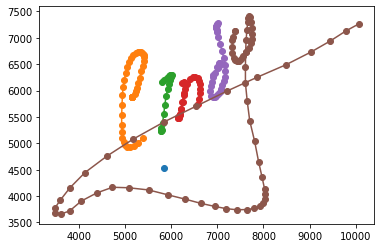

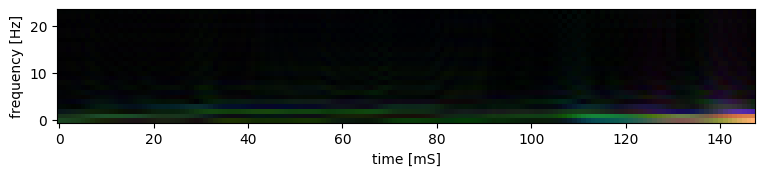

In [ ]:
index = 1520
print("データ長:", X_length[index])
print("窓のサイズ:", n_window)
plot_character(X[index])
plot_spectrogram(X_freqs[index], figsize=(50, 1.5), dpi=100)

#### Zero padding and standardization of data

In [ ]:
X_freqs = pad_sequences(X_freqs, padding='post', value=0)
# X_freqs[X_freqs<0] = 0
X_freqs = (X_freqs - X_freqs.min())/(X_freqs.max()-X_freqs.min())

In [ ]:
img_rows, img_cols, img_channels = X_freqs.shape[1:]

In [ ]:
from keras import backend as K
if K.image_data_format() == 'channels_first':
    X_freqs = X_freqs.reshape(X_freqs.shape[0], img_channels, img_rows, img_cols)
    input_shape = (img_channels, img_rows, img_cols)
else:
    X_freqs = X_freqs.reshape(X_freqs.shape[0], img_rows, img_cols, img_channels)
    input_shape = (img_rows, img_cols, img_channels)

### Required functions

#### Function to reset keras

Creating models for each user can create many models and run out of memory, so after learning and evaluating one user, delete the model and reset keras.

In [ ]:
import gc
from keras.backend.tensorflow_backend import set_session
from keras.backend.tensorflow_backend import clear_session
from keras.backend.tensorflow_backend import get_session
import tensorflow

# Reset Keras Session
def reset_keras():
    sess = get_session()
    clear_session()
    sess.close()
    sess = get_session()

    try:
        del classifier # this is from global space - change this as you need
    except:
        pass

    # print(gc.collect()) # if it's done something you should see a number being outputted
    gc.collect()

    # use the same config as you used to create the session
    config = tensorflow.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    set_session(tensorflow.Session(config=config))

#### Function to get EER (Equal Error Rate)

Create an EER function to use for accuracy evaluation.<br>
EER is the error rate when the threshold value is adjusted afterwards so that FAR and FRR match. EER is often used as a measure of the accuracy performance of authentication technology. The smaller the EER, the higher the accuracy.(https://www.mofiria.com/biometrics-and-security-blog/biometrics/biometrics-terminology/)

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
def get_eer(y_true, y_score):
  fpr, tpr, threshold = roc_curve(y_true, y_score, pos_label=1)
  fnr = 1 - tpr
  eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
  EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
  return EER

### About the model

#### Model creation

In [ ]:
input_shape = X_freqs.shape[1:]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Masking
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adadelta
import tensorflow as tf

def build_model(input_shape):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                  activation='relu'))
  model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy',
                # optimizer=Adadelta(),
                optimizer='adam',
                metrics=['accuracy'])
  return model

#### Hyper parameters

In [ ]:
batch_size = 5
epochs = 20

#### Learning the model

In [ ]:
train_EER_list = []
test_EER_list = []
test_size = 0.2
for user_index in range(1, num_user+1):
  print("user_index:", user_index)
  mask = user == user_index
  X_train, X_test, y_train, y_test = train_test_split(X_freqs[mask], genuine[mask], test_size=test_size, random_state=7, shuffle=True, stratify=genuine[mask])
  model = build_model(input_shape=input_shape)
  model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)
  train_eer = get_eer(y_train, pred_train)
  test_eer = get_eer(y_test, pred_test)
  print("train EER(%):", train_eer*100)
  print("test EER(%):", test_eer*100)
  train_EER_list.append(train_eer*100)
  test_EER_list.append(test_eer*100)
  del model
  #reset_keras()
  #gc.collect()
  print()

user_index: 1






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 32 samples, validate on 8 samples
Epoch 1/20





32/32 [==============================] - 7s 212ms/step - loss: 0.5576 - acc: 0.7813 - val_loss: 0.1622 - val_acc: 1.0000
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.1579 - acc: 0.9688 - val_loss: 0.0146 - val_acc: 1.0000
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0249 - acc: 1.0000 - val_loss: 8.2401e-04 - val_acc: 1.0000
Epoch 4/20
32/32 [==============================] - 0s 5ms/step - loss: 5.3897e-04 - acc: 1.0000 - val_loss: 7.3806e-05 - val_acc: 1.0000
Epoch 5/20
32/32 [==============================] - 0s 5ms/step - loss: 6.0740e-05 - acc: 1.0000 - val_loss: 1.1944e-05 - val_acc: 1.0000
Epoch 6/20
32/32 [=============================

### About result

#### Evaluation of accuracy

In [ ]:
print("Average Train EER(%):", np.mean(train_EER_list))
print("Average Test EER(%):", np.mean(test_EER_list))

Average Train EER(%): 0.0
Average Test EER(%): 5.0


# Homework

## CNN
Multiclass classify lowercase alphabet images。<br>
Fill in the model creation and execute it properly, and check the results.<br>
Read and use necessary libraries as needed.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import os
import io
import glob

### About dataset

#### Data description

# 新しいセクション

HandDB_Lower_Alphabet.npz records images and their correct labels in lowercase a to z.<br>
This image was created from online character and is 32x32 in size.

#### Loading data

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ" -O HandDB_Lower_Alphabet.npz

--2019-12-12 06:31:02--  https://drive.google.com/uc?export=download&id=1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ
Resolving drive.google.com (drive.google.com)... 108.177.11.138, 108.177.11.113, 108.177.11.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.11.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4mmk2mljhn0vlmodbdcg6tls6vn6sf35/1576130400000/12360162376384578551/*/1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ?e=download [following]
--2019-12-12 06:31:03--  https://doc-14-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4mmk2mljhn0vlmodbdcg6tls6vn6sf35/1576130400000/12360162376384578551/*/1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ?e=download
Resolving doc-14-3c-docs.googleusercontent.com (doc-14-3c-docs.googleusercontent.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to doc-14-3c-docs.googleusercontent.com (doc-1

In [ ]:
data = np.load('HandDB_Lower_Alphabet.npz', allow_pickle=True)
X = data['x']
y = data['y']
n2c = data['n2c'].item()

#### View data

ターゲットの数: 26


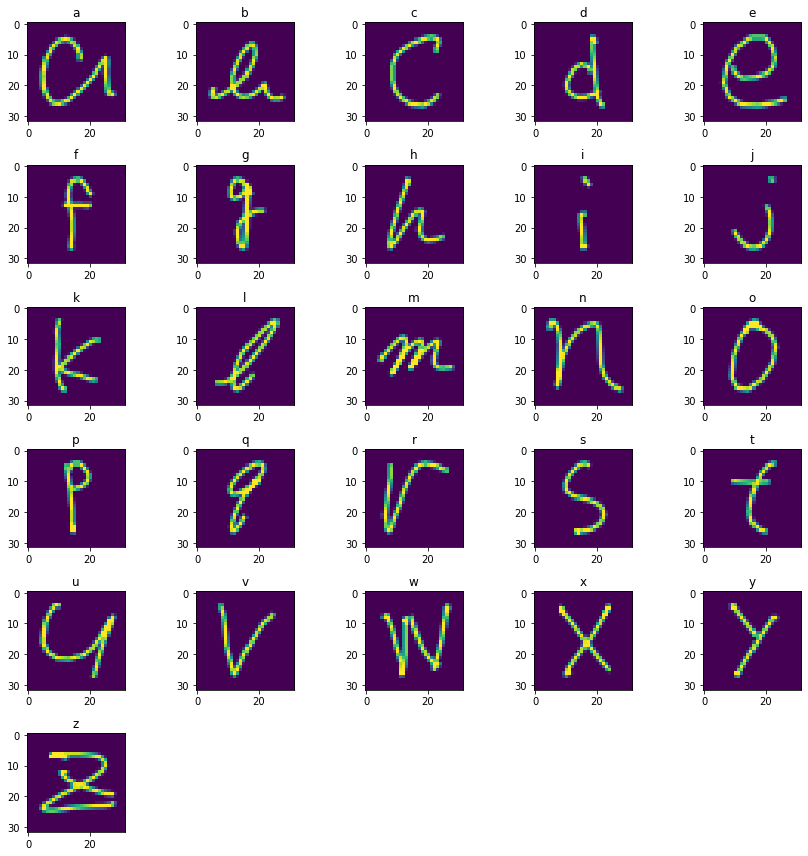

In [ ]:
n_target = max(y)+1
print("Number of targets:", n_target)
fig = plt.figure(figsize=(12, 12))
for i in range(n_target):
  ax = fig.add_subplot(6, 5, i+1)
  ax.imshow(X[y.tolist().index(i)].reshape(X.shape[1], X.shape[2]))
  ax.set_title(n2c[i])
plt.tight_layout()

#### Data normalization

In [ ]:
X /= 255

In [ ]:
from keras import backend as K
img_rows, img_cols, img_channels = X.shape[1:]
if K.image_data_format() == 'channels_first':
    X = X.reshape(X.shape[0], img_channels, img_rows, img_cols)
    input_shape = (img_channels, img_rows, img_cols)
else:
    X = X.reshape(X.shape[0], img_rows, img_cols, img_channels)
    input_shape = (img_rows, img_cols, img_channels)

Using TensorFlow backend.


#### Split into training and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### About the model

#### Parameters
* Adjust the parameters yourself and see the changes

In [ ]:
batch_size = ?
num_classes = ?
epochs = ?

#### Model creation
* Create a CNN model. See what happens when you change layers.
* Check the change by Loss and Optimizer at compile time.

In [ ]:
model = ?

model.compile(loss=?,
              optimizer=?,
              ?)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




#### Model visualization

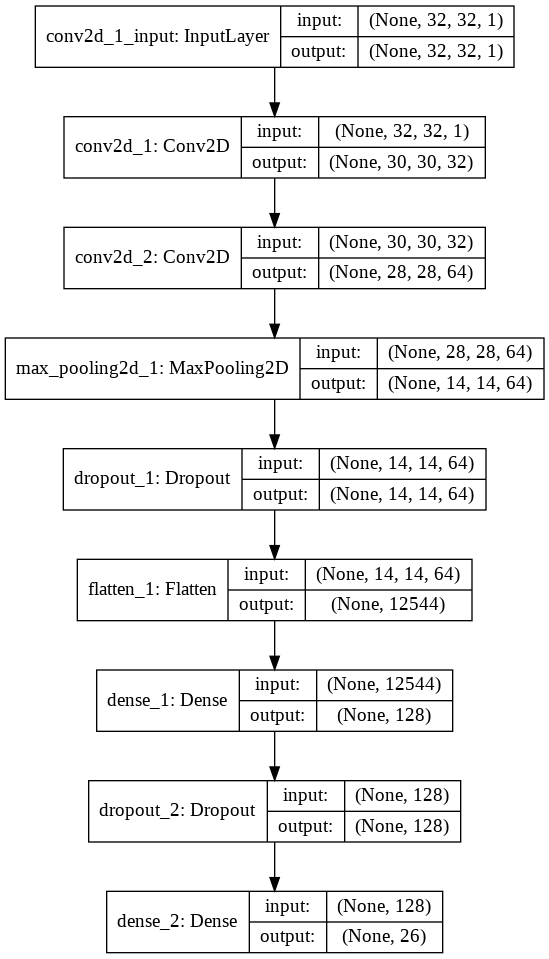

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

#### Learning the model

In [ ]:
hist = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 2300 samples, validate on 767 samples
Epoch 1/25





2300/2300 [==============================] - 8s 3ms/step - loss: 2.8274 - acc: 0.2091 - val_loss: 1.9631 - val_acc: 0.4589
Epoch 2/25
2300/2300 [==============================] - 0s 57us/step - loss: 1.8106 - acc: 0.4678 - val_loss: 1.1608 - val_acc: 0.6910
Epoch 3/25
2300/2300 [==============================] - 0s 55us/step - loss: 1.2601 - acc: 0.6352 - val_loss: 0.7877 - val_acc: 0.7849
Epoch 4/25
2300/2300 [==============================] - 0s 56us/step - loss: 1.0079 - acc: 0.7126 - val_loss: 0.6581 - val_acc: 0.8279
Epoch 5/25
2300/2300 [==============================] - 0s 56us/step - loss: 0.8674 - acc: 0.7535 - val_loss: 0.6115 - val_acc: 0.8396
Epoch 6/25
2300/2300 [==============================] - 0s 54us/step - loss: 0.7348 - acc: 0.7778 - val_loss: 0.5600 - val_acc: 0.8435
Epoch 7/25
2300/2300 [====================

### About result

#### Accuracy for test data

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3646806423713828
Test accuracy: 0.9126466754362512


#### Visualize the learning process

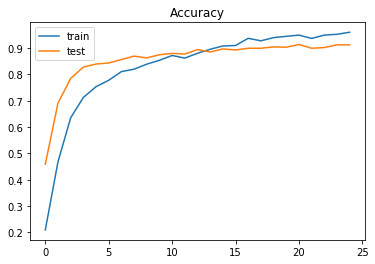

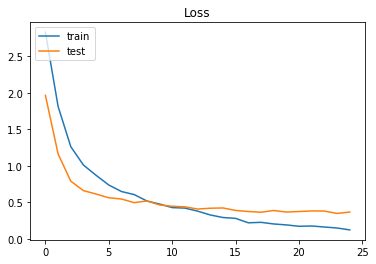

In [ ]:
# Plot transition of accuracy rate
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Plot loss transition
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

#### Confusion matrix for test data

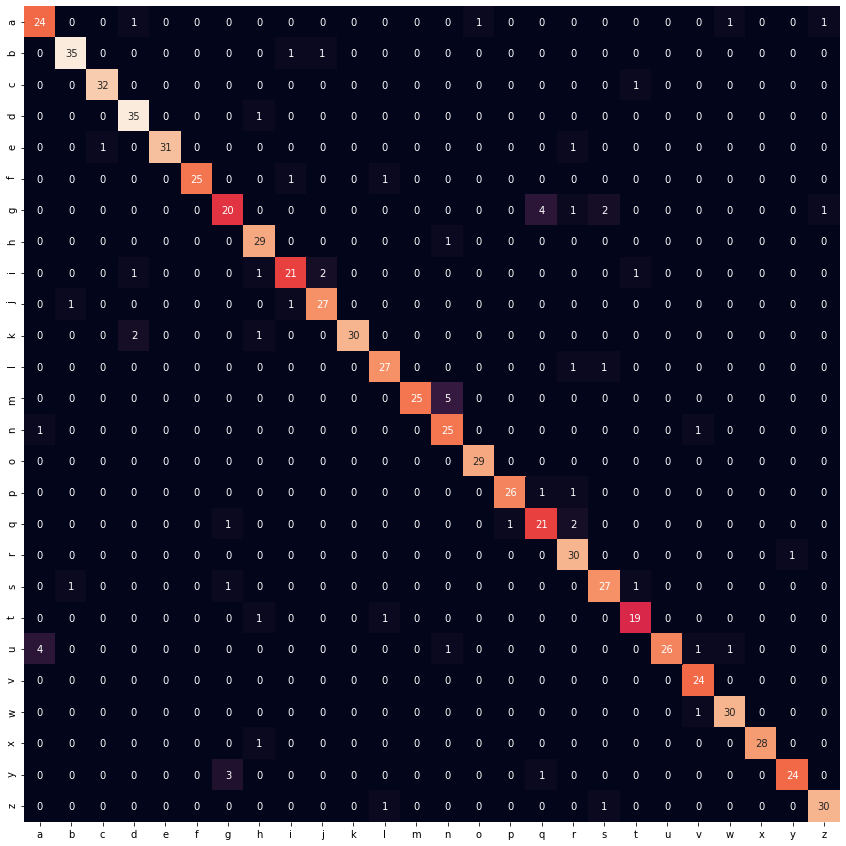

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predicted = np.argmax(model.predict(X_test), axis=1)
cmx = confusion_matrix(y_test, predicted)
df_cmx = pd.DataFrame(cmx, index=n2c.values(), columns=n2c.values())
plt.figure(figsize = (15,15))
sns.heatmap(df_cmx, annot=True, cbar=False, square=True, fmt="d")

## RNN
Identify the signature data of the online characters as the person or another person.(Signature Verification)<br>
In writer authentication, a model is created for each user, and the user is classified as a binary.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import re
import glob

from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

### About dataset

#### Data description

SVC2004_Task1_5users.npz records signature data of five online characters.<br>
The online characters are padded with -1 to fill in the missing parts to make them all the same length.<br>
The following data is recorded in addition to the online character data.
* Target user
* Written or fake by another person
* Actual data length

The following data is recorded in online character data.
* Stroke Number - current stroke number (if -1, pen-up state)
* X-coordinate - scaled cursor position along the x-axis
* Y-coordinate - scaled cursor position along the y-axis
* Time stamp - system time at which the event was posted

#### Loading data

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1Xbs8tNR8G59ptaLETc6dU44G0agFmC8z" -O SVC2004_Task1_5users.npz

--2021-05-10 06:49:10--  https://drive.google.com/uc?export=download&id=1Xbs8tNR8G59ptaLETc6dU44G0agFmC8z
Resolving drive.google.com (drive.google.com)... 142.250.99.138, 142.250.99.102, 142.250.99.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.99.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/it539d3kg4bopum3k4b3m1kd1pn45uhu/1620629325000/12360162376384578551/*/1Xbs8tNR8G59ptaLETc6dU44G0agFmC8z?e=download [following]
--2021-05-10 06:49:10--  https://doc-14-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/it539d3kg4bopum3k4b3m1kd1pn45uhu/1620629325000/12360162376384578551/*/1Xbs8tNR8G59ptaLETc6dU44G0agFmC8z?e=download
Resolving doc-14-3c-docs.googleusercontent.com (doc-14-3c-docs.googleusercontent.com)... 172.253.117.132, 2607:f8b0:400e:c0a::84
Connecting to doc-14-3c-docs.googleusercontent.com (doc-1

In [ ]:
data = np.load("SVC2004_Task1_5users.npz")

In [ ]:
X = data["x"]
user = data["user"]
genuine = data["genuine"]
X_length = data["x_length"]

In [ ]:
num_user = max(user) + 1
timesteps, features = X.shape[-2:]
print("Number of Users:", num_user)
print("Timesteps:", timesteps)
print("Features:", features)

Number of Users: 5
Timesteps: 784
Features: 4


#### View data

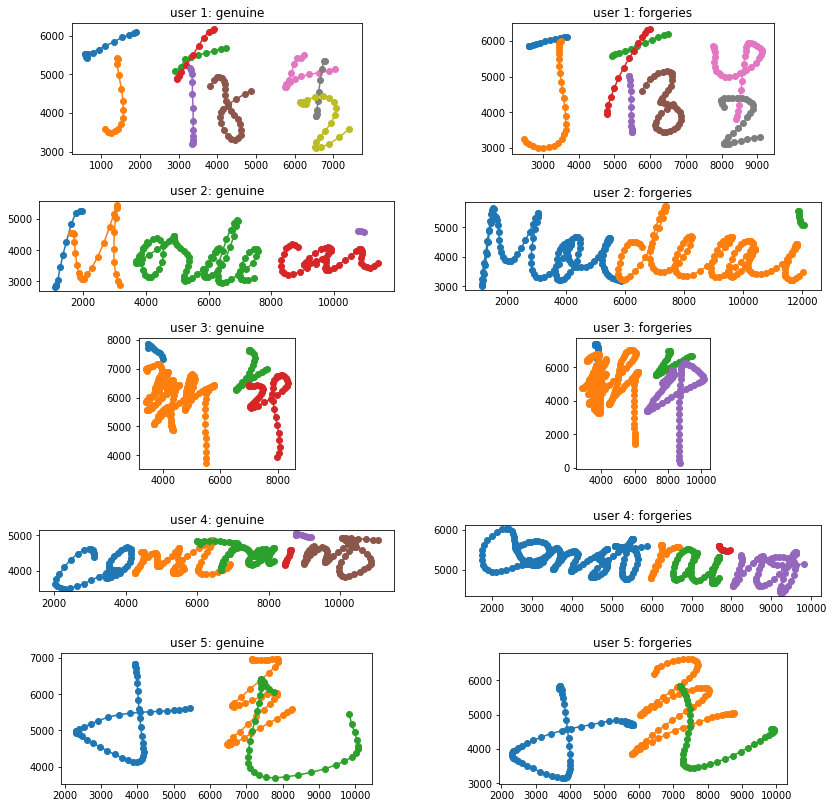

In [ ]:
fig = plt.figure(figsize=(14, 14))
for i in range(num_user):
  for j in range(2):
    data = X[user==i][j*20]
    n_stroke = data[:, 0].max()
    ax = fig.add_subplot(5, 2, i*2+j+1)
    for i_stroke in range(n_stroke+1):
      ax.plot(*data[data[:, 0]==i_stroke][:, [1, 2]].T, marker='o')
      ax.set_title(f'user {i+1}: {"genuine" if j == 0 else "forgeries"}')
      ax.set_aspect('equal')

### Required functions

#### Function to reset keras

In [ ]:
import gc
from tensorflow.compat.v1.keras.backend import set_session
from tensorflow.compat.v1.keras.backend import clear_session
from tensorflow.compat.v1.keras.backend import get_session
import tensorflow

# Reset Keras Session
def reset_keras():
    sess = get_session()
    clear_session()
    sess.close()
    sess = get_session()

    try:
        del classifier # this is from global space - change this as you need
    except:
        pass

    # print(gc.collect()) # if it's done something you should see a number being outputted
    gc.collect()

    # use the same config as you used to create the session
    config = tensorflow.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    set_session(tensorflow.Session(config=config))

#### Function to get EER (Equal Error Rate)

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
def get_eer(y_true, y_score):
  fpr, tpr, threshold = roc_curve(y_true, y_score, pos_label=1)
  fnr = 1 - tpr
  eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
  EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
  return EER

### About the model

#### Model creation
* RCreate an RNN model. Check the change when the structure is changed.
* Check the change by Loss and Optimizer at compile time.

Bidirectional LSTM<br>
https://keras.io/examples/imdb_bidirectional_lstm/<br>
Stacked LSTM<br>
https://keras.io/getting-started/sequential-model-guide/#stacked-lstm-for-sequence-classification<br>

In [ ]:
def build_model(input_shape):
  model = ?

  model.compile(loss=?,
                optimizer=?,
                ?)
  return model

#### Hyper parameters
* Adjust the parameters yourself and see the changes

In [ ]:
batch_size = ?
epochs = ?

#### Learning the model

In [ ]:
train_EER_list = []
test_EER_list = []
test_size = 0.2
for user_index in range(num_user):
  print("user_index:", user_index)
  mask = user == user_index
  X_train, X_test, y_train, y_test = train_test_split(X[mask], genuine[mask], test_size=test_size, random_state=7, shuffle=True, stratify=genuine[mask])
  model = build_model(input_shape=(timesteps, features))
  model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)
  train_eer = get_eer(y_train, pred_train)
  test_eer = get_eer(y_test, pred_test)
  print("train EER(%):", train_eer*100)
  print("test EER(%):", test_eer*100)
  train_EER_list.append(train_eer*100)
  test_EER_list.append(test_eer*100)
  del model
  #reset_keras()
  #gc.collect()
  print()
  # break

user_index: 0




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





Train on 32 samples, validate on 8 samples
Epoch 1/20





32/32 [==============================] - 18s 549ms/step - loss: 0.7527 - acc: 0.4375 - val_loss: 0.6022 - val_acc: 0.5000
Epoch 2/20
32/32 [==============================] - 13s 408ms/step - loss: 0.6067 - acc: 0.6875 - val_loss: 0.5406 - val_acc: 0.6250
Epoch 3/20
32/32 [==============================] - 12s 374ms/step - loss: 0.5613 - acc: 0.7188 - val_loss: 0.5708 - val_acc: 0.6250
Epoch 4/20
32/32 [==============================] - 13s 412ms/step - loss: 0.5300 - acc: 0.7500 - val_loss: 0.5087 - val_acc: 0.8750
Epoch 5/20
32/32 [==============================] - 12s 389ms/step - loss: 0.5153 - acc: 0.8125 - val_loss: 0.5005 - val_acc: 0.8750
Epoch 6/20
32/32 [==============================] - 12s

### About result

#### Evaluation of accuracy

In [ ]:
print("Average Train EER(%):", np.mean(train_EER_list))
print("Average Test EER(%):", np.mean(test_EER_list))

Average Train EER(%): 7.5
Average Test EER(%): 25.0
